In [7]:
%matplotlib notebook
from skmultiflow.data import SEAGenerator
from skmultiflow.trees import HoeffdingTreeClassifier
from skmultiflow.evaluation import EvaluatePrequential

<IPython.core.display.Javascript object>


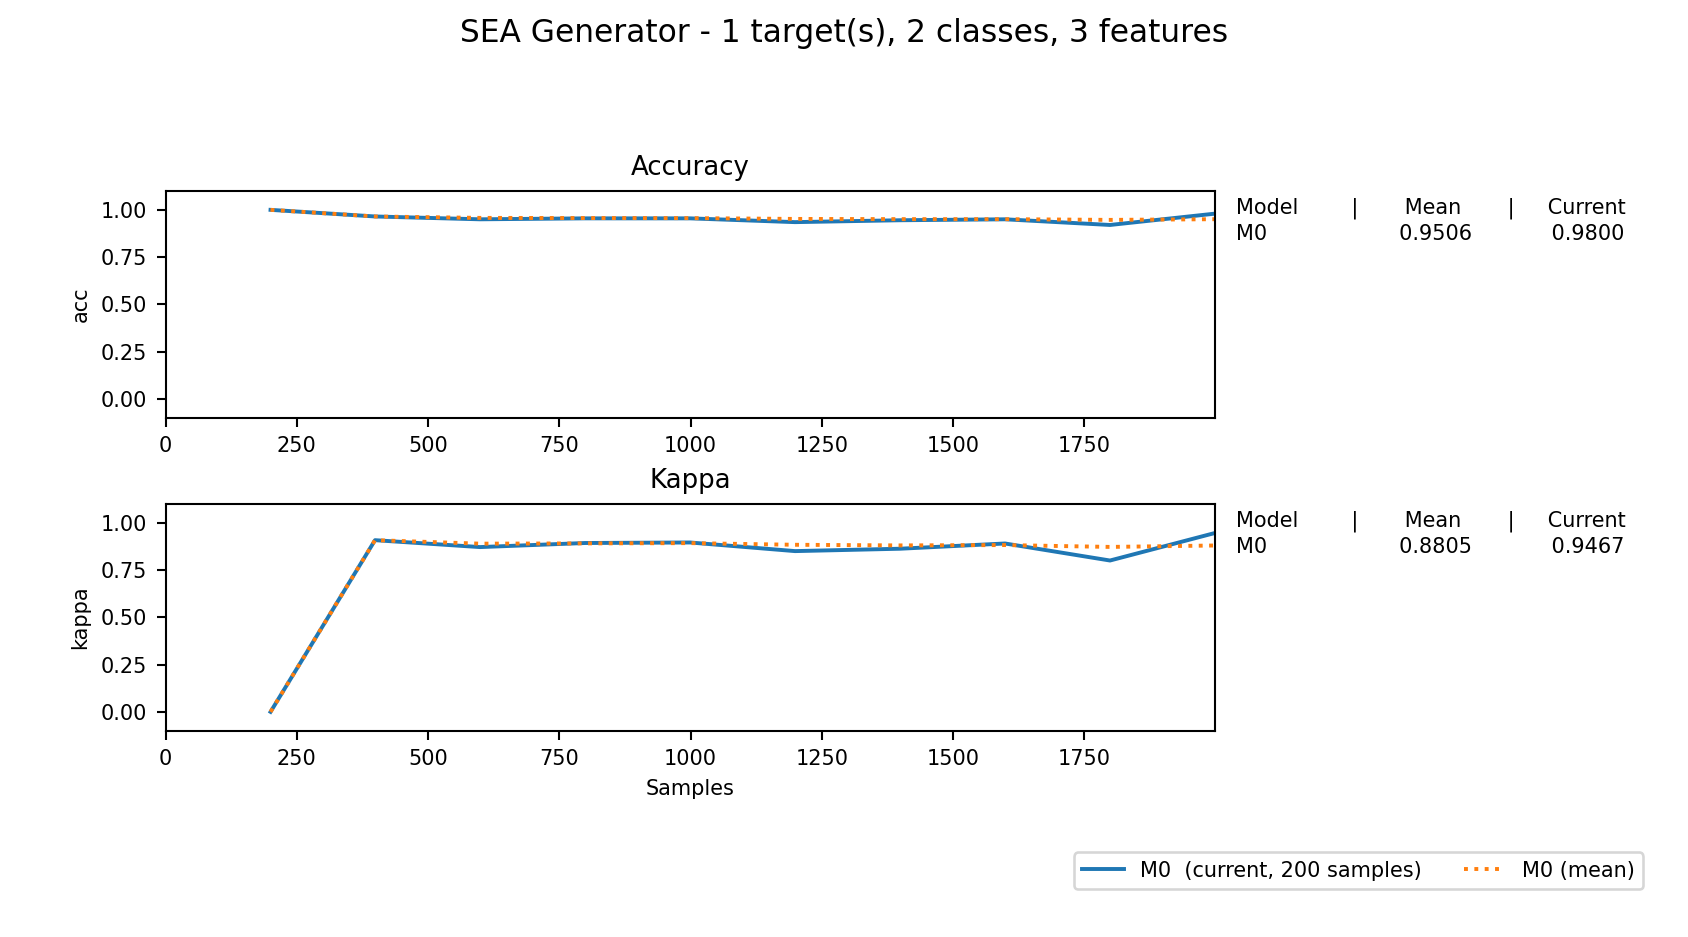

Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 200 sample(s).
Evaluating...
 #################### [100%] [0.28s]
Processed samples: 2000
Mean performance:
M0 - Accuracy     : 0.9506
M0 - Kappa        : 0.8805


[HoeffdingTreeClassifier(binary_split=False, grace_period=200,
                         leaf_prediction='nba', max_byte_size=33554432,
                         memory_estimate_period=1000000, nb_threshold=0,
                         no_preprune=False, nominal_attributes=None,
                         remove_poor_atts=False, split_confidence=1e-07,
                         split_criterion='info_gain', stop_mem_management=False,
                         tie_threshold=0.05)]

In [2]:

# 创建一个数据流生成器
stream = SEAGenerator()

# 指定要使用的分类器
classifier = HoeffdingTreeClassifier()

# 设置评估器
evaluator = EvaluatePrequential(show_plot=True,
                                pretrain_size=200,
                                max_samples=2000)

# 在数据流上运行评估
evaluator.evaluate(stream=stream, model=classifier)

SEAGenerator(balance_classes=False, classification_function=0,
             noise_percentage=0.0, random_state=None)

<IPython.core.display.Javascript object>


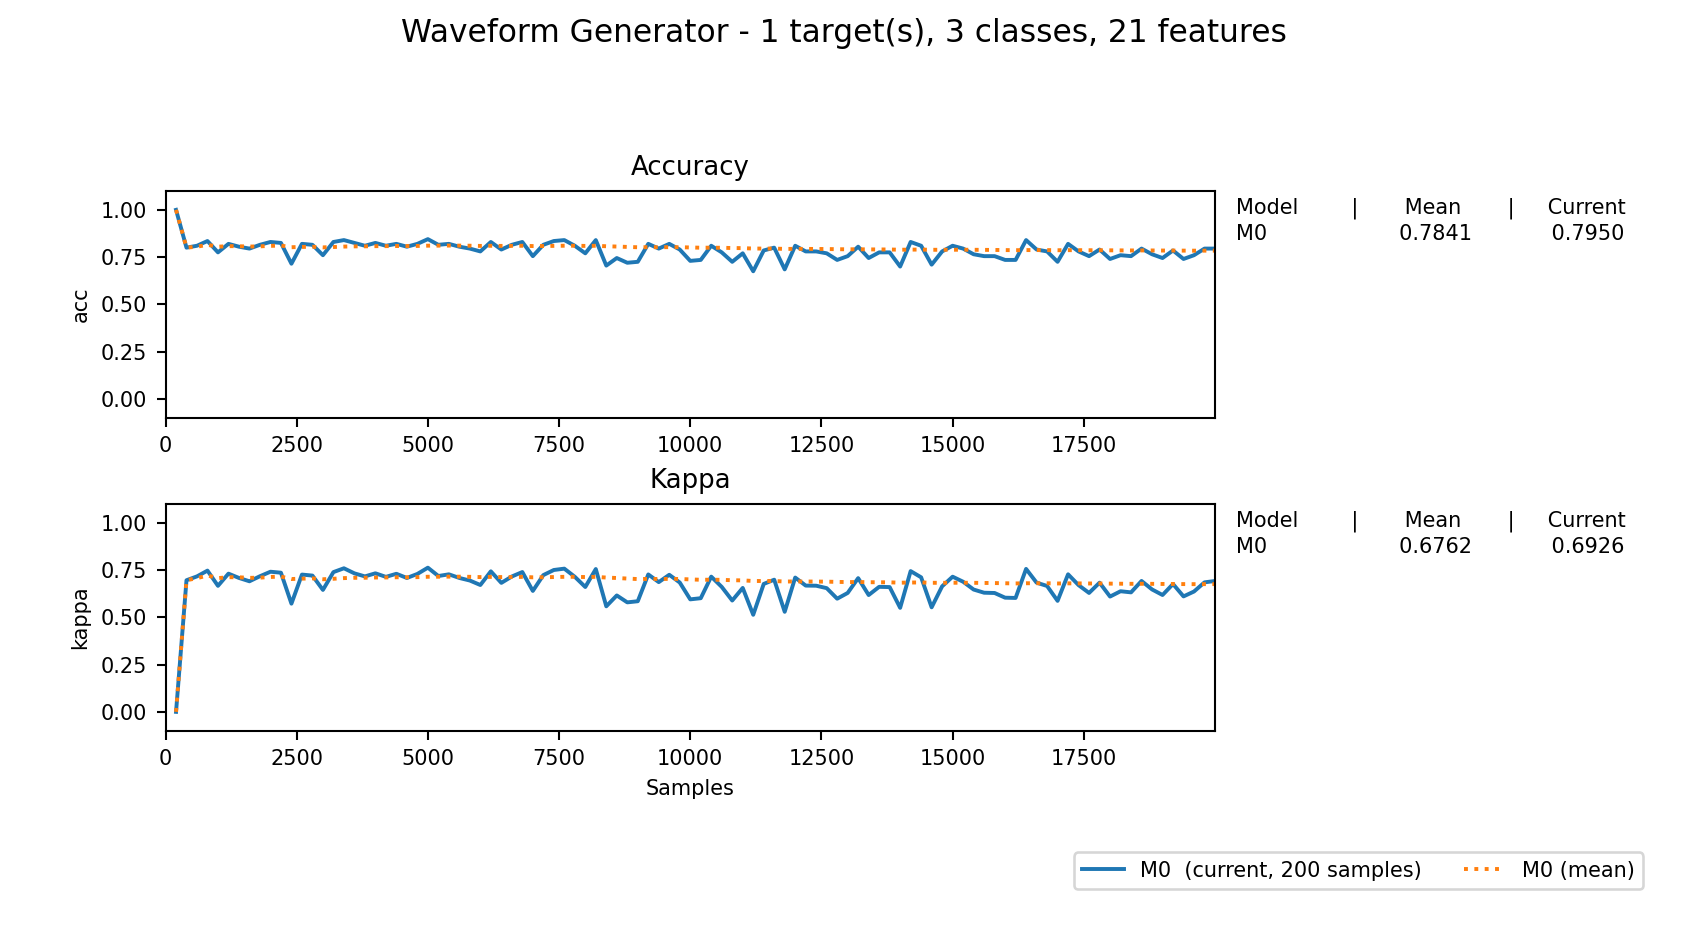

Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 200 sample(s).
Evaluating...
 #################### [100%] [8.39s]
Processed samples: 20000
Mean performance:
M0 - Accuracy     : 0.7841
M0 - Kappa        : 0.6762


[HoeffdingTreeClassifier(binary_split=False, grace_period=200,
                         leaf_prediction='nba', max_byte_size=33554432,
                         memory_estimate_period=1000000, nb_threshold=0,
                         no_preprune=False, nominal_attributes=None,
                         remove_poor_atts=False, split_confidence=1e-07,
                         split_criterion='info_gain', stop_mem_management=False,
                         tie_threshold=0.05)]

In [3]:
from skmultiflow.data import WaveformGenerator
from skmultiflow.trees import HoeffdingTreeClassifier
from skmultiflow.evaluation import EvaluatePrequential
# 1. Create a stream
stream = WaveformGenerator()
# 2. Instantiate the HoeffdingTreeClassifier
ht = HoeffdingTreeClassifier()
# 3. Setup the evaluator
evaluator = EvaluatePrequential(show_plot=True,
                                pretrain_size=200,
                                max_samples=20000)
# 4. Run evaluation
evaluator.evaluate(stream=stream, model=ht)

<IPython.core.display.Javascript object>


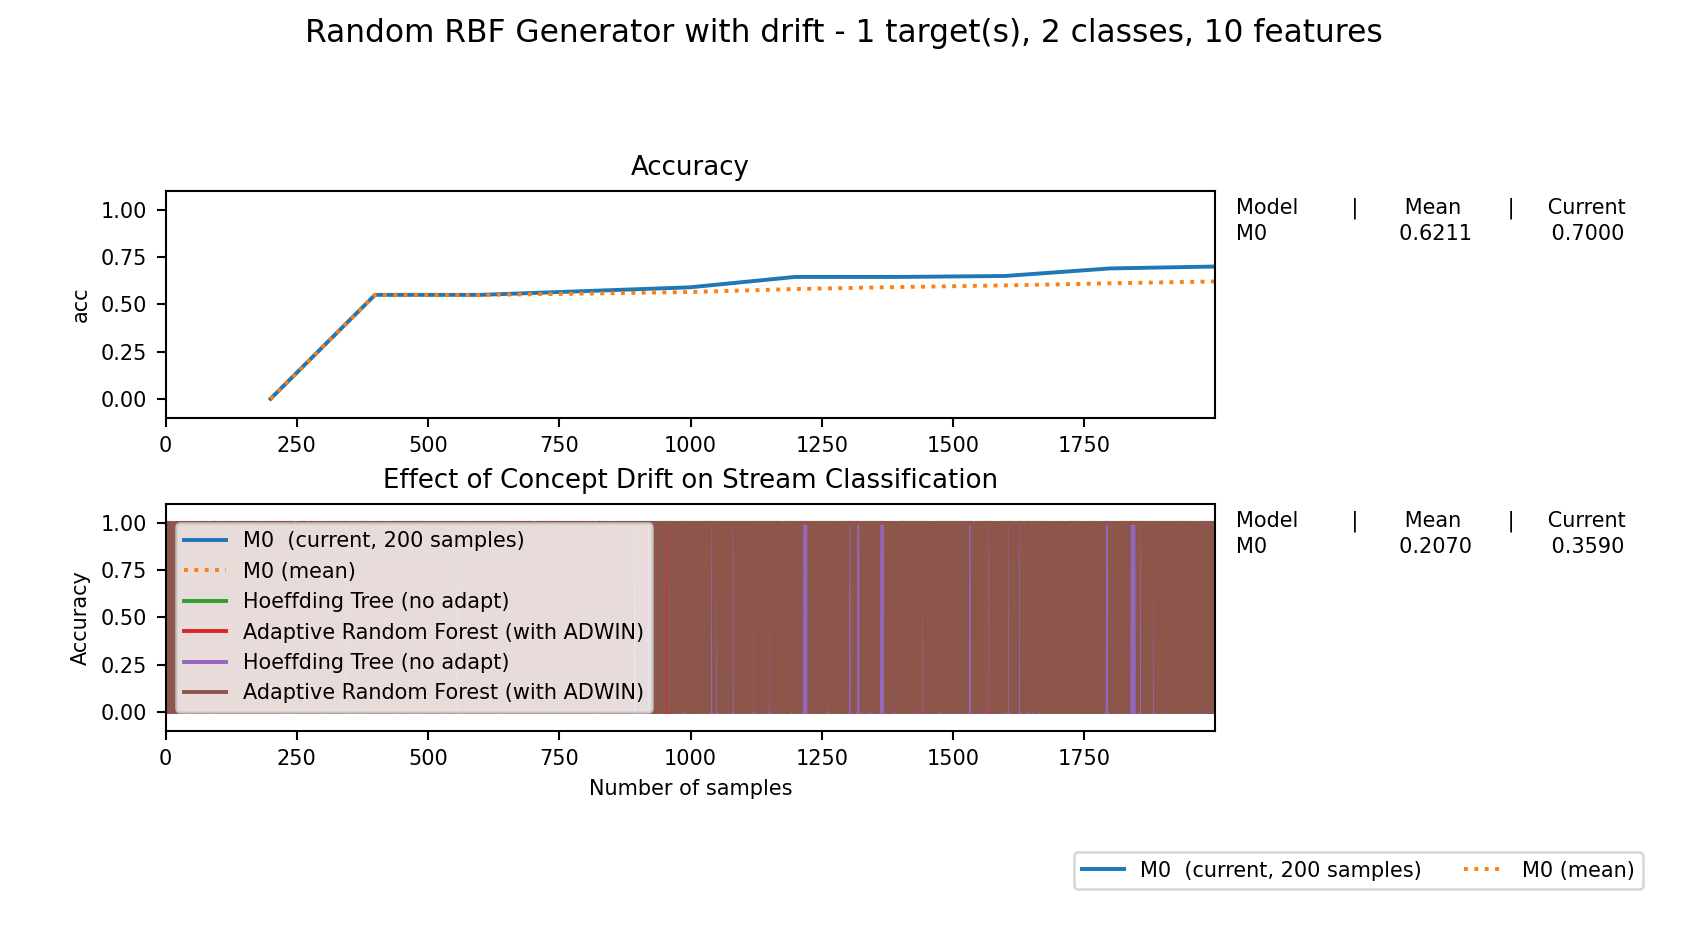

Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 200 sample(s).
Evaluating...
 #################### [100%] [6.86s]
Processed samples: 2000
Mean performance:
M0 - Accuracy     : 0.6211
M0 - Kappa        : 0.2070


[AdaptiveRandomForestClassifier(binary_split=False, disable_weighted_vote=False,
                                drift_detection_method=None, grace_period=50,
                                lambda_value=6, leaf_prediction='nba',
                                max_byte_size=33554432, max_features=3,
                                memory_estimate_period=2000000, n_estimators=10,
                                nb_threshold=0, no_preprune=False,
                                nominal_attributes=None,
                                performance_metric='acc', random_state=None,
                                remove_poor_atts=False, split_confidence=0.01,
                                split_criterion='info_gain',
                                stop_mem_management=False, tie_threshold=0.05,
                                warning_detection_method=ADWIN(delta=0.01))]

In [2]:
from skmultiflow.data import RandomRBFGeneratorDrift
from skmultiflow.meta import AdaptiveRandomForestClassifier
from skmultiflow.evaluation import EvaluatePrequential

# 创建一个数据流生成器，包含概念漂移
stream = RandomRBFGeneratorDrift(change_speed=10)

# 使用具有 ADWIN 概念漂移检测的 AdaptiveRandomForest 分类器
classifier = AdaptiveRandomForestClassifier(drift_detection_method='ADWIN')

# 设置评估器
evaluator = EvaluatePrequential(show_plot=True,
                                pretrain_size=200,
                                max_samples=2000)

# 在数据流上运行评估
evaluator.evaluate(stream=stream, model=classifier)

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from skmultiflow.data import RandomRBFGeneratorDrift
from skmultiflow.trees import HoeffdingTreeClassifier
from skmultiflow.meta import AdaptiveRandomForestClassifier
from skmultiflow.evaluation import EvaluatePrequential

# 创建一个数据流生成器，其中包含概念漂移
stream = RandomRBFGeneratorDrift(change_speed=10)

# 创建分类器
# 1. 一个简单的 HoeffdingTree 分类器，没有概念漂移适应
# 2. 一个具有 ADWIN 概念漂移检测的 AdaptiveRandomForest 分类器
clf_no_adapt = HoeffdingTreeClassifier()
clf_with_adapt = AdaptiveRandomForestClassifier(drift_detection_method='ADWIN')

# 设置评估器
evaluator = EvaluatePrequential(show_plot=False,  # 不直接显示图，我们稍后会绘制我们自己的图
                                pretrain_size=200,
                                max_samples=2000,
                                metrics=['accuracy'],
                                output_file='results.csv')  # 输出到文件

# 在数据流上运行评估
evaluator.evaluate(stream=stream, model=[clf_no_adapt, clf_with_adapt], model_names=['HT', 'ARF'])

# 加载结果并绘制图形
data = np.loadtxt('results.csv', delimiter=',', skiprows=1)

sample_count = data[:, 0]
accuracy_no_adapt = data[:, 2]
accuracy_with_adapt = data[:, 3]

plt.plot(sample_count, accuracy_no_adapt, label='Hoeffding Tree (no adapt)')
plt.plot(sample_count, accuracy_with_adapt, label='Adaptive Random Forest (with ADWIN)')
plt.xlabel('Number of samples')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Effect of Concept Drift on Stream Classification')
plt.show()

Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 200 sample(s).
Evaluating...
 #################### [100%] [6.79s]
Processed samples: 2000
Mean performance:
HT - Accuracy     : 0.5006
ARF - Accuracy     : 0.6011


ValueError: could not convert string to float: 'id'

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from skmultiflow.data import RandomRBFGeneratorDrift
from skmultiflow.trees import HoeffdingTreeClassifier
from skmultiflow.meta import AdaptiveRandomForestClassifier
from skmultiflow.evaluation import EvaluatePrequential

# 创建一个数据流生成器，其中包含概念漂移
stream = RandomRBFGeneratorDrift(change_speed=10)

# 创建分类器
# 1. 一个简单的 HoeffdingTree 分类器，没有概念漂移适应
# 2. 一个具有 ADWIN 概念漂移检测的 AdaptiveRandomForest 分类器
clf_no_adapt = HoeffdingTreeClassifier()
clf_with_adapt = AdaptiveRandomForestClassifier(drift_detection_method='ADWIN')

# 设置评估器
evaluator = EvaluatePrequential(show_plot=False,  # 不直接显示图，我们稍后会绘制我们自己的图
                                pretrain_size=200,
                                max_samples=2000,
                                metrics=['accuracy'],
                                output_file='results.csv')  # 输出到文件

# 在数据流上运行评估
evaluator.evaluate(stream=stream, model=[clf_no_adapt, clf_with_adapt], model_names=['HT', 'ARF'])

# 使用pandas加载结果并绘制图形
data = pd.read_csv('results.csv')

sample_count = data['id']
accuracy_no_adapt = data['HT - Accuracy']
accuracy_with_adapt = data['ARF - Accuracy']

plt.plot(sample_count, accuracy_no_adapt, label='Hoeffding Tree (no adapt)')
plt.plot(sample_count, accuracy_with_adapt, label='Adaptive Random Forest (with ADWIN)')
plt.xlabel('Number of samples')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Effect of Concept Drift on Stream Classification')
plt.show()

Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 200 sample(s).
Evaluating...
 #################### [100%] [6.58s]
Processed samples: 2000
Mean performance:
HT - Accuracy     : 0.6028
ARF - Accuracy     : 0.6639


ParserError: Error tokenizing data. C error: Expected 7 fields in line 3, saw 13


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from skmultiflow.data import RandomRBFGeneratorDrift
from skmultiflow.trees import HoeffdingTreeClassifier
from skmultiflow.meta import AdaptiveRandomForestClassifier
from skmultiflow.evaluation import EvaluatePrequential

# Create a stream with concept drift
stream = RandomRBFGeneratorDrift(change_speed=10)
stream.prepare_for_use()

# Create classifiers
clf_no_adapt = HoeffdingTreeClassifier()
clf_with_adapt = AdaptiveRandomForestClassifier(drift_detection_method='ADWIN')

# Variables to store performance
sample_count = []
accuracy_no_adapt = []
accuracy_with_adapt = []

# Setup evaluator
evaluator = EvaluatePrequential(show_plot=False,
                                pretrain_size=200,
                                max_samples=2000,
                                metrics=['accuracy'])

# Run evaluation
n_samples = 0
max_samples = 2000
while n_samples < max_samples:
    X, y = stream.next_sample()
    prediction = evaluator.test_then_train(clf_no_adapt, X, y)
    sample_count.append(n_samples)
    accuracy_no_adapt.append(np.mean(prediction == y))

    prediction = evaluator.test_then_train(clf_with_adapt, X, y)
    accuracy_with_adapt.append(np.mean(prediction == y))
    
    n_samples += 1

# Plot the results
plt.plot(sample_count, accuracy_no_adapt, label='Hoeffding Tree (no adapt)')
plt.plot(sample_count, accuracy_with_adapt, label='Adaptive Random Forest (with ADWIN)')
plt.xlabel('Number of samples')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Effect of Concept Drift on Stream Classification')
plt.show()

D:\anaconda\lib\site-packages\skmultiflow\data\base_stream.py:191: FutureWarning: 'prepare_for_use' has been deprecated in v0.5.0 and will be removed in v0.7.0.
New instances of the Stream class are now ready to use after instantiation.
  warnings.warn(


AttributeError: 'EvaluatePrequential' object has no attribute 'test_then_train'

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from skmultiflow.data import RandomRBFGeneratorDrift
from skmultiflow.trees import HoeffdingTreeClassifier
from skmultiflow.meta import AdaptiveRandomForestClassifier

# Create a stream with concept drift
stream = RandomRBFGeneratorDrift(change_speed=10)
stream.prepare_for_use()

# Create classifiers
clf_no_adapt = HoeffdingTreeClassifier()
clf_with_adapt = AdaptiveRandomForestClassifier(drift_detection_method='ADWIN')

# Variables to store performance
sample_count = []
accuracy_no_adapt = []
accuracy_with_adapt = []

# Number of samples to process
max_samples = 2000
n_samples = 0

# Process the samples
while n_samples < max_samples:
    X, y = stream.next_sample()
    
    # Without adaptation
    prediction_no_adapt = clf_no_adapt.predict(X)
    clf_no_adapt = clf_no_adapt.partial_fit(X, y)
    
    # With adaptation
    prediction_with_adapt = clf_with_adapt.predict(X)
    clf_with_adapt = clf_with_adapt.partial_fit(X, y)
    
    # Increment the sample count
    n_samples += 1
    
    # Store results
    sample_count.append(n_samples)
    accuracy_no_adapt.append(np.mean(prediction_no_adapt == y))
    accuracy_with_adapt.append(np.mean(prediction_with_adapt == y))

# Plot the results
plt.plot(sample_count, accuracy_no_adapt, label='Hoeffding Tree (no adapt)')
plt.plot(sample_count, accuracy_with_adapt, label='Adaptive Random Forest (with ADWIN)')
plt.xlabel('Number of samples')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Effect of Concept Drift on Stream Classification')
plt.show()

In [2]:
import pandas as pd
import numpy as np


import sys
sys.path.append("C:/Users/27211/Desktop/summer project/src-Siyu")

from predict.evaluate import *

from skmultiflow.data import FileStream
from skmultiflow.trees import HoeffdingTreeClassifier, HoeffdingAdaptiveTreeClassifier
from skmultiflow.bayes import NaiveBayes
from skmultiflow.lazy import KNNClassifier
from skmultiflow.meta import AdaptiveRandomForestClassifier
from skmultiflow.evaluation import EvaluatePrequential

def save_labelled_stream(stream,filename):
    df = pd.DataFrame(stream)
    df[df.columns[-1]] = df[df.columns[-1]].astype('int')
    df.to_csv(filename,header=None,index=None)
    

def remove_comments(file):
    # delete comments (comment_cnt lines) in the file
    comment_cnt = 0
    fin = open(file,'r')
    lines = fin.readlines()
    for line in lines:
        line = line.strip()
        if line.startswith('#'):
            comment_cnt +=1
        else:
            break
    lines_without_comments = ''.join(lines[comment_cnt:])
    fin.close()
    fout = open(file,'w')
    fout.write(lines_without_comments)
    fout.close()


if __name__ == '__main__':
    # Imports
    import numpy as np
    from skmultiflow.drift_detection import PageHinkley
    ph = PageHinkley()
    # Simulating a data stream as a normal distribution of 1's and 0's
    data_stream = np.random.randint(2, size=2000)
    # Changing the data concept from index 999 to 2000
    for i in range(999, 2000):
    # Adding stream elements to the PageHinkley drift detector and verifying if drift occurred
        data_stream[i] = np.random.randint(4, high=8)
    for i in range(2000):
        ph.add_element(data_stream[i])
        if ph.detected_change():
            print('Change has been detected in data: ' + str(data_stream[i]) + ' - of index: ' + str(i))

Change has been detected in data: 5 - of index: 1007
Change has been detected in data: 7 - of index: 1307


In [7]:
import sys
sys.path.append("C:/Users/27211/Desktop/summer project/src-Siyu")
import os
import numpy as np
import pandas as pd
import matlab.engine
import logging
from pathlib import Path

from correlation import correlation_pairwise, correlation_mean
from skmultiflow.drift_detection import PageHinkley

In [8]:
def read_streams(base_dir,header):
    streams = list()
    stream_all = None
    
    base_dir_list = os.listdir(base_dir)
    for file in base_dir_list:
        file_abbr = file.split('.')[-1]
        file_dir = os.path.join(base_dir, file)
        if (file.startswith('stream')) and (file_abbr=='csv'):
            if header is None:
                df = pd.read_csv(file_dir, header=None)
            else:
                df = pd.read_csv(file_dir)
            if file.split('.')[0].endswith('all'):
                stream_all = np.array(df)
            else:
                streams.append(np.array(df))
            
    return streams, stream_all

In [37]:
def detect_single_stream(stream, has_label, drift_detection_method):
    eng = matlab.engine.start_matlab()
    eng.cd('C:/Users/27211/Desktop/summer project/src-Siyu/matlab-single-data-stream concept drift detection/main',nargout=0)
    
    if drift_detection_method == 'HCDT':
        if has_label:
            stream = stream[:,:-1]
        if stream.ndim == 1:
            stream = stream.reshape(-1,1)
        detected_drift_points = eng.HCDT(matlab.double(stream.tolist()))
    elif (drift_detection_method == 'HLFR') and has_label:
        detected_drift_points = eng.HLFR(matlab.double(stream.tolist()))
    elif drift_detection_method == 'CUSUM':
        detected_drift_points = np.array([])
        if has_label:
            stream = stream[:,:-1]
            
        ph = PageHinkley()
        for i in range(stream.shape[0]):
            ph.add_element(stream[i,:])
            if ph.detected_change():
                detected_drift_points = np.append(detected_drift_points, i)
    else:
        detected_drift_points = None
    eng.quit()
    return detected_drift_points

corrs_window_size = 50
single_stream_drift_detection_methods = ['HCDT','HLFR']

In [10]:
import numpy as np
import scipy.signal as signal
from scipy.stats import pearsonr, spearmanr

In [11]:
def correlation_pairwise_univariate(stream_x1, stream_x2, window_size=50,correlation_type='cross',save_file=True,output_dir=''):
    corrs = np.array([])
    for i in range(window_size, stream_x1.shape[0]):
        stream_1_slot = stream_x1[i-window_size:i]
        stream_2_slot = stream_x2[i-window_size:i]
        if correlation_type == 'cross':
            corr = signal.correlate(stream_1_slot, stream_2_slot, mode='full')
            corr_lag_0 = corr[corr.shape[0]//2]/window_size
            corrs = np.append(corrs, corr_lag_0)
        elif correlation_type == 'pearsonr':
            res = pearsonr(stream_1_slot,stream_2_slot)
            corrs = np.append(corrs,res.statistic)
        elif correlation_type == 'spearman':
            res = spearmanr(stream_1_slot,stream_2_slot)
            corrs = np.append(corrs,res.correlation)
        else:
            pass
    
    if save_file:
        np.savetxt(output_dir,corrs,delimiter=',')
    return corrs


# suppose 2-D stream_1 and 1-D stream_2 has the same size
# Each row represents a data instance, each row represents an attribute (one dimension) of data instances
def correlation_pairwise_multivariate(stream_x1,stream_x2, correlation_type = 'cross', window_size=50,save_file=True,output_dir=''):
    corrs = np.array([])
    for t in range(window_size, stream_x1.shape[0]):
        stream_1_slot = stream_x1[t-window_size:t,:]
        stream_2_slot = stream_x2[t-window_size:t,:]
        
        corrs_pairdim = np.array([])
        for i in range(stream_x1.shape[1]):
            for j in range(stream_x2.shape[1]):
                stream_1_slot_univariate = stream_1_slot[:,i]
                stream_2_slot_univariate = stream_2_slot[:,j]
                if correlation_type == 'cross':
                    corr = signal.correlate(stream_1_slot_univariate, stream_2_slot_univariate, mode='full')
                    corr_lag_0 = corr[corr.shape[0]//2]/window_size
                    corrs_pairdim = np.append(corrs_pairdim,corr_lag_0)
                elif correlation_type == 'pearson':
                    res = pearsonr(stream_1_slot_univariate, stream_2_slot_univariate)
                    corrs_pairdim = np.append(corrs_pairdim, res.statistic)
                elif correlation_type == 'spearman':
                    res = spearmanr(stream_1_slot_univariate, stream_2_slot_univariate)
                    corrs_pairdim = np.append(corrs_pairdim, res.correlation)
        corrs = np.append(corrs,np.mean(corrs_pairdim))
        
    if save_file:
        np.savetxt(output_dir,corrs,delimiter=',')
    return corrs

def correlation_pairwise(stream_1,stream_2,correlation_type='cross',window_size=50,save_file=True,output_dir=''):
    stream_x1 = stream_1[:,:-1]
    stream_x2 = stream_2[:,:-1]
    if (stream_x1.ndim == 1) & (stream_x2.ndim==1):
        return correlation_pairwise_univariate(stream_x1,stream_x2,correlation_type,window_size,save_file,output_dir)
    if (stream_x1.ndim ==2) & (stream_x2.ndim==2):
        return correlation_pairwise_multivariate(stream_x1,stream_x2,correlation_type,window_size,save_file,output_dir)
    else:
        return None 
    
def correlation_mean(streams, correlation_type='cross',window_size=50, save_file=True, output_dir = ''):
    stream_length = streams[0].shape[0]
    stream_num = len(streams)
    
    corrs = np.zeros(stream_length-window_size)
    cnt = 0
    for i in range(stream_num):
        stream_1 = streams[i]
        for j in range(i+1, stream_num):
            stream_2 = streams[j]
            corrs = corrs + correlation_pairwise(stream_1, stream_2, correlation_type, window_size, save_file=False)
            cnt = cnt + 1     
    corrs = corrs/cnt
    
    if save_file:
        np.savetxt(output_dir,corrs,delimiter=',')
    return corrs

In [12]:
if __name__ == '__main__':
    base_dir = "C:/Users/27211/Desktop/summer project/src-Siyu/log/synthetic/dangerous_driving/gradual_correlation_drift/"
    drift_detection_method = 'CDDM'
    
    output_folder = f'{base_dir}detect_result/'
    path = Path(output_folder)    
    path.mkdir(parents=True, exist_ok=True)
    output_file = f'{output_folder}detect_stream_{drift_detection_method}.log'
    logging.basicConfig(level=logging.INFO, filename=output_file, format='%(message)s', filemode='w')
    
    streams, stream_all = read_streams(base_dir,header=np.array([])) 

In [13]:
streams

[array([[1.417022  , 1.        ],
        [0.4359949 , 0.        ],
        [0.5507979 , 0.        ],
        ...,
        [1.44560423, 1.        ],
        [0.95656248, 0.        ],
        [1.80342804, 1.        ]]),
 array([[0.83404401, 0.        ],
        [2.8719898 , 1.        ],
        [3.10159581, 1.        ],
        ...,
        [0.89120846, 0.        ],
        [3.91312496, 1.        ],
        [1.60685608, 0.        ]]),
 array([[4.25106601, 1.        ],
        [1.30798471, 0.        ],
        [1.65239371, 0.        ],
        ...,
        [1.33681269, 0.        ],
        [5.86968744, 1.        ],
        [2.41028412, 0.        ]])]

In [14]:
stream_all

array([[1.417022  , 0.83404401, 4.25106601, 0.        ],
       [0.4359949 , 2.8719898 , 1.30798471, 1.        ],
       [0.5507979 , 3.10159581, 1.65239371, 1.        ],
       ...,
       [1.44560423, 0.89120846, 1.33681269, 1.        ],
       [0.95656248, 3.91312496, 5.86968744, 1.        ],
       [1.80342804, 1.60685608, 2.41028412, 1.        ]])

In [28]:
if __name__ == '__main__':

    base_dir = "C:/Users/27211/Desktop/summer project/src-Siyu/log/synthetic/dangerous_driving/gradual_correlation_drift/"
    drift_detection_method = 'CDDM'
    
    output_folder = f'{base_dir}detect_result/'
    path = Path(output_folder)    
    path.mkdir(parents=True, exist_ok=True)
    output_file = f'{output_folder}detect_stream_{drift_detection_method}.log'
    logging.basicConfig(level=logging.INFO, filename=output_file, format='%(message)s', filemode='w')
    streams, stream_all = read_streams(base_dir,header=np.array([]))  


In [38]:
corrs = correlation_pairwise(streams[1],streams[2],correlation_type='cross',window_size=corrs_window_size,save_file=True,output_dir=f'{base_dir}correlation.csv')

In [34]:
logging.debug(f'Correlation stream: {corrs}')
corrs

array([ 4.87388816,  4.93885796,  5.0438021 ,  5.12892091,  4.97226813,
        4.95192852,  4.98346045,  4.98500225,  4.84845417,  5.06054148,
        4.94355851,  5.09853281,  5.08136862,  5.01876081,  4.98812878,
        4.83178577,  4.82037884,  4.87585637,  4.78625046,  4.81948642,
        4.92192707,  4.9421968 ,  4.92614259,  4.95864402,  4.76201653,
        4.67386369,  4.67442602,  4.81325526,  4.6680586 ,  4.56503805,
        4.53326773,  4.54693108,  4.39745846,  4.39899995,  4.3999734 ,
        4.44045759,  4.31858878,  4.22863395,  4.29271995,  4.28112937,
        4.23343945,  4.22474182,  4.36344314,  4.46493048,  4.42954225,
        4.22722216,  4.09072838,  4.26005456,  4.41013693,  4.49806008,
        4.50999546,  4.46808207,  4.40259614,  4.28923594,  4.23800367,
        4.23668066,  4.00337818,  4.01468197,  3.98945529,  3.8943515 ,
        3.86292715,  3.80085153,  3.85855123,  3.9446    ,  3.90281721,
        3.89898846,  3.93952781,  3.91689316,  4.09744498,  4.23

In [39]:
corrs_detection = np.asarray(detect_single_stream(corrs, False, 'HCDT')) + corrs_window_size

In [40]:
corrs_detection

690.0

In [47]:
def test(evaluator,reset_model, need_adapt,detected_drift_points,retrain_num,reset):    
    adapt_X = None
    adapt_y = None
    
    if need_adapt:
        drift_point_cnt = 0
        adapt_start_point = detected_drift_points[drift_point_cnt]
        adapt_end_point = adapt_start_point + retrain_num -1
    
    evaluator._start_time = timer()
    evaluator._end_time = timer()
    print('Prequential Evaluation')
    print('Evaluating {} target(s).'.format(evaluator.stream.n_targets))

    actual_max_samples = evaluator.stream.n_remaining_samples()
    if actual_max_samples == -1 or actual_max_samples > evaluator.max_samples:
        actual_max_samples = evaluator.max_samples

    first_run = True
    if evaluator.pretrain_size > 0:
        print('Pre-training on {} sample(s).'.format(evaluator.pretrain_size))

        X, y = evaluator.stream.next_sample(evaluator.pretrain_size)
        
        if need_adapt:
            adapt_X = np.zeros((0,X.shape[1]))
            adapt_y = np.zeros(0)

        for i in range(evaluator.n_models):
            if evaluator._task_type == constants.CLASSIFICATION:
                # Training time computation
                evaluator.running_time_measurements[i].compute_training_time_begin()
                evaluator.model[i].partial_fit(X=X, y=y, classes=evaluator.stream.target_values)
                evaluator.running_time_measurements[i].compute_training_time_end()
            elif evaluator._task_type == constants.MULTI_TARGET_CLASSIFICATION:
                evaluator.running_time_measurements[i].compute_training_time_begin()
                evaluator.model[i].partial_fit(X=X, y=y, classes=unique(evaluator.stream.target_values))
                evaluator.running_time_measurements[i].compute_training_time_end()
            else:
                evaluator.running_time_measurements[i].compute_training_time_begin()
                evaluator.model[i].partial_fit(X=X, y=y)
                evaluator.running_time_measurements[i].compute_training_time_end()
            evaluator.running_time_measurements[i].update_time_measurements(evaluator.pretrain_size)
        evaluator.global_sample_count += evaluator.pretrain_size
        first_run = False

    update_count = 0
    print('Evaluating...')
    while ((evaluator.global_sample_count < actual_max_samples) & (evaluator._end_time - evaluator._start_time < evaluator.max_time)
            & (evaluator.stream.has_more_samples())):
        try:
            X, y = evaluator.stream.next_sample(evaluator.batch_size)

            if X is not None and y is not None:
                
                # Test
                prediction = [[] for _ in range(evaluator.n_models)]
                for i in range(evaluator.n_models):
                    try:
                        # Testing time
                        evaluator.running_time_measurements[i].compute_testing_time_begin()
                        prediction[i].extend(evaluator.model[i].predict(X))
                        evaluator.running_time_measurements[i].compute_testing_time_end()
                    except TypeError:
                        raise TypeError("Unexpected prediction value from {}"
                                        .format(type(evaluator.model[i]).__name__))
                evaluator.global_sample_count += evaluator.batch_size

                for j in range(evaluator.n_models):
                    for i in range(len(prediction[0])):
                        evaluator.mean_eval_measurements[j].add_result(y[i], prediction[j][i])
                        evaluator.current_eval_measurements[j].add_result(y[i], prediction[j][i])
                evaluator._check_progress(actual_max_samples)

                # Active adapt
                if (need_adapt) and (adapt_start_point<= evaluator.global_sample_count <= adapt_end_point): 
                    if reset and (evaluator.global_sample_count == adapt_start_point):                                  
                        evaluator._init_evaluation(model=reset_model, stream=evaluator.stream, model_names=evaluator.model_names)
                    
                    # TODO: evaluator.batch_size must be 1
                    assert evaluator.batch_size == 1
                    adapt_X = np.concatenate((adapt_X,X),axis=0)
                    adapt_y = np.concatenate((adapt_y,y),axis=0)
                    
                    if first_run:
                        for i in range(evaluator.n_models):
                            if evaluator._task_type != constants.REGRESSION and \
                               evaluator._task_type != constants.MULTI_TARGET_REGRESSION:
                                # Accounts for the moment of training beginning
                                evaluator.running_time_measurements[i].compute_training_time_begin()
                                evaluator.model[i].partial_fit(X, y, evaluator.stream.target_values)
                                # Accounts the ending of training
                                evaluator.running_time_measurements[i].compute_training_time_end()
                            else:
                                evaluator.running_time_measurements[i].compute_training_time_begin()
                                evaluator.model[i].partial_fit(X, y)
                                evaluator.running_time_measurements[i].compute_training_time_end()

                            # Update total running time
                            evaluator.running_time_measurements[i].update_time_measurements(evaluator.batch_size)
                        first_run = False
                    else:
                        for i in range(evaluator.n_models):
                            evaluator.running_time_measurements[i].compute_training_time_begin()
                            evaluator.model[i].partial_fit(X, y)
                            evaluator.running_time_measurements[i].compute_training_time_end()
                            evaluator.running_time_measurements[i].update_time_measurements(evaluator.batch_size)
                            
                    if evaluator.global_sample_count == adapt_end_point:                        
                        for i in range(evaluator.n_models):
                            evaluator.running_time_measurements[i].compute_training_time_begin()
                            evaluator.model[i].partial_fit(adapt_X, adapt_y)
                            evaluator.running_time_measurements[i].compute_training_time_end()
                            evaluator.running_time_measurements[i].update_time_measurements(evaluator.batch_size)
                        
                        # preparing for the next concept drift
                        adapt_X = np.zeros((0,X.shape[1]))
                        adapt_y = np.zeros(0)
                        
                        drift_point_cnt = drift_point_cnt + 1
                        if drift_point_cnt < detected_drift_points.shape[0]:
                            adapt_start_point = detected_drift_points[drift_point_cnt]
                            adapt_end_point = adapt_start_point + retrain_num
                        else:
                            adapt_start_point = np.inf
                            adapt_end_point = np.inf
                        
                        

                if ((evaluator.global_sample_count % evaluator.n_wait) == 0 or
                        (evaluator.global_sample_count >= actual_max_samples) or
                        (evaluator.global_sample_count / evaluator.n_wait > update_count + 1)):
                    if prediction is not None:
                        evaluator._update_metrics()
                    update_count += 1

            evaluator._end_time = timer()
        except BaseException as exc:
            print(exc)
            if exc is KeyboardInterrupt:
                evaluator._update_metrics()
            break

    # Flush file buffer, in case it contains data
    evaluator._flush_file_buffer()

    if len(set(evaluator.metrics).difference({constants.DATA_POINTS})) > 0:
        evaluator.evaluation_summary()
    else:
        print('Done')

    if evaluator.restart_stream:
        evaluator.stream.restart()

    return evaluator.model


def evaluate(evaluator, stream, model, model_names, need_adapt=False, detected_drift_points=np.array([]), retrain_num = 200, reset=True):
    """ Evaluates a model or set of models on samples from a stream.
    Parameters
    ----------
    stream: Stream
        The stream from which to draw the samples.
    model: skmultiflow.core.BaseStreamModel or sklearn.base.BaseEstimator or list
        The model or list of models to evaluate.
    model_names: list, optional (Default=None)
        A list with the names of the models.
    Returns
    -------
    StreamModel or list
        The trained model(s).
    """
    
    original_model = copy.deepcopy(model)
        
    evaluator._init_evaluation(model=model, stream=stream, model_names=model_names)

    if evaluator._check_configuration():
        evaluator._reset_globals()
        # Initialize metrics and outputs (plots, log files, ...)
        evaluator._init_metrics()
        evaluator._init_plot()
        evaluator._init_file()
        
        evaluator.model = test(evaluator,original_model,need_adapt,detected_drift_points,retrain_num,reset)

        if evaluator.show_plot:
            evaluator.visualizer.hold()

        return evaluator.model
    
def fading_accuracy(cur_accuracy, fading_factor):
    stream_length = cur_accuracy.shape[0]
    cur_error = 1 - cur_accuracy
    
    fraction = 0
    fading_error = np.zeros(stream_length)
    for i, cur_err in enumerate(cur_error):
        fraction = fading_factor * fraction + 1
        if i==0:
            fading_error[i] = cur_err
        else:
            fading_error[i] = (fading_error[i-1]*((fraction-1)/fading_factor)*fading_factor + cur_err) / fraction
    
    return 1 - fading_error
 
 
def get_evaluation_mean_performance(evaluator):
    mean_measurements = evaluator.get_mean_measurements()
    model_num = len(mean_measurements)
    
    mean_performance = np.zeros((model_num, 4))
    for i, mean_measurement in enumerate(mean_measurements):
        mean_performance[i,0] = mean_measurement.accuracy_score()
        mean_performance[i,1] = mean_measurement.kappa_score()
        mean_performance[i,2] = mean_measurement.recall_score()
        mean_performance[i,3] = mean_measurement.f1_score()
    return mean_performance

In [48]:
import numpy as np
import pandas as pd

from skmultiflow.data.file_stream import FileStream
from skmultiflow.evaluation import EvaluatePrequential

from model import init_models, print_model_names
from evaluate import evaluate, fading_accuracy, get_evaluation_mean_performance

from pathlib import Path
from utils import remove_comments


def predict_stream(base_dir, filename, model_names, fading_factors=np.array([0.99])):
    model_name_all = print_model_names(model_names)
    
    output_folder = f'{base_dir}{model_name_all}'
    path = Path(output_folder)
    path.mkdir(parents=True, exist_ok=True)   
    output_file = f'{output_folder}/predict_{filename}'
    
    stream = FileStream(f'{base_dir}{filename}')
    models = init_models(model_names)
    evaluator = EvaluatePrequential(n_wait=1, max_samples = 10000, pretrain_size=200, metrics=['accuracy','kappa','recall','f1'],show_plot=False,output_file=output_file)
    evaluate(evaluator, stream, models, model_names, need_adapt=False)
    
    remove_comments(output_file)
    
    # add mean_accuracy with fading factor
    df = pd.read_csv(output_file)
    for model_name in model_names:
        cur_accuracy = df[f'current_acc_[{model_name}]']
        for fading_factor in fading_factors:
            df[f'mean_acc_{fading_factor}_fading_[{model_name}]'] = fading_accuracy(cur_accuracy,fading_factor)
    df.to_csv(output_file,index=0)    
    
    return get_evaluation_mean_performance(evaluator)
    
def predict_stream_with_passive_adapt(base_dir, filename, model_names, fading_factors=np.array([0.99])):
    model_name_all = print_model_names(model_names)
    
    output_folder = f'{base_dir}{model_name_all}_passive_adapt/'
    path = Path(output_folder)
    path.mkdir(parents=True, exist_ok=True)
    output_file = f'{output_folder}predict_{filename}'
    
    stream = FileStream(f'{base_dir}{filename}')
    models = init_models(model_names)
    evaluator = EvaluatePrequential(n_wait=1, max_samples = 10000, pretrain_size=200, metrics=['accuracy','kappa','recall','f1'],show_plot=False,output_file=output_file)
    evaluator.evaluate(stream=stream, model=models,model_names=model_names)
    
    remove_comments(output_file)
    
    # add mean_accuracy with fading factor
    df = pd.read_csv(output_file)
    for model_name in model_names:
        cur_accuracy = df[f'current_acc_[{model_name}]']
        for fading_factor in fading_factors:
            df[f'mean_acc_{fading_factor}_fading_[{model_name}]'] = fading_accuracy(cur_accuracy,fading_factor)
    df.to_csv(output_file, index=0)
    
    return get_evaluation_mean_performance(evaluator)

def predict_stream_with_active_adapt(base_dir, filename, model_names, detect_drift_method_name, detected_drift_points, retrain_num = 200, reset=True, fading_factors=np.array([0.99])):
    model_name_all = print_model_names(model_names)
    
    if reset:
        output_folder = f'{base_dir}{model_name_all}_{detect_drift_method_name}_adapt_reset/'
    else:
        output_folder = f'{base_dir}{model_name_all}_{detect_drift_method_name}_adapt_noreset/'
    path = Path(output_folder)
    path.mkdir(parents=True, exist_ok=True)
    output_file = f'{output_folder}predict_{filename}'
    
    stream = FileStream(f'{base_dir}{filename}')
    models = init_models(model_names)
    
    evaluator = EvaluatePrequential(n_wait=1, max_samples = 10000, pretrain_size=200, metrics=['accuracy','kappa','recall','f1'], show_plot=False,output_file=output_file)
    
    evaluate(evaluator=evaluator, stream=stream,model=models,model_names=model_names, need_adapt=True, detected_drift_points=detected_drift_points, retrain_num = retrain_num, reset=reset)
    
    remove_comments(output_file)
    
    # add mean_accuracy with fading factor
    df = pd.read_csv(output_file)
    for model_name in model_names:
        cur_accuracy = df[f'current_acc_[{model_name}]']
        for fading_factor in fading_factors:
            df[f'mean_acc_{fading_factor}_fading_[{model_name}]'] = fading_accuracy(cur_accuracy,fading_factor)
    df.to_csv(output_file, index=0)

    return get_evaluation_mean_performance(evaluator)

In [50]:
if __name__ == '__main__':
    base_dir = 'C:/Users/27211/Desktop/summer project/src-Siyu/log/synthetic/dangerous_driving/sudden_correlation_drift/'
    # base_dir = 'log/synthetic/dangerous_driving/gradual_correlation_drift/'
    # base_dir = 'log/synthetic/dangerous_driving/incremental_correlation_drift/'
    
    # base_dir = 'log/synthetic/sin_function/sudden_correlation_drift/'
    # base_dir = 'log/synthetic/sin_function/gradual_correlation_drift/'
    # base_dir = 'log/synthetic/sin_function/incremental_correlation_drift/'
    
    # base_dir = 'log/real-world/poker_hand/'
    # base_dir = 'log/real-world/electricity/'
    # base_dir = 'log/real-world/airlines/'
    
    filename = 'stream_all.csv'
    
    # model_names = ['NB','HT']
    
    model_names = ['NB','HAT','ARF']

    detect_drift_method_name = 'CDDM'
        
    detected_drift_points = np.array([500])
    # detected_drift_points = np.array([410])
    # detected_drift_points = np.array([560])
    
    # detected_drift_points = np.array([500])
    # detected_drift_points = np.array([410])
    # detected_drift_points = np.array([230])
    
    # detected_drift_points = np.array([590.0,  890.0, 1270.0, 2010.0, 2550.0])
    # detected_drift_points = np.array([270.0, 1090.0, 1330.0, 1690.0, 2463.0])
    # detected_drift_points = np.array([1050.0,4350.0])
    
    predict_stream(base_dir,filename, model_names)
    predict_stream_with_passive_adapt(base_dir,filename,model_names)
    predict_stream_with_active_adapt(base_dir, filename, model_names, detect_drift_method_name, detected_drift_points, reset=True)
    predict_stream_with_active_adapt(base_dir, filename, model_names, detect_drift_method_name, detected_drift_points, reset=False)

Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 200 sample(s).
Evaluating...
 #################### [98%] [1.61s]#################### [100%] [1.63s]
Processed samples: 999
Mean performance:
NB - Accuracy     : 0.7584
NB - Kappa        : 0.4817
NB - Recall: 0.6975
NB - F1 score: 0.8218
HAT - Accuracy     : 0.7347
HAT - Kappa        : 0.4475
HAT - Recall: 0.6677
HAT - F1 score: 0.8008
ARF - Accuracy     : 0.5319
ARF - Kappa        : 0.2215
ARF - Recall: 0.4138
ARF - F1 score: 0.5854
Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 200 sample(s).
Evaluating...
 #################### [100%] [4.83s]
Processed samples: 999
Mean performance:
NB - Accuracy     : 0.9574
NB - Kappa        : 0.8774
NB - Recall: 0.9467
NB - F1 score: 0.9726
HAT - Accuracy     : 0.9424
HAT - Kappa        : 0.8384
HAT - Recall: 0.9279
HAT - F1 score: 0.9626
ARF - Accuracy     : 0.9950
ARF - Kappa        : 0.9846
ARF - Recall: 0.9937
ARF - F1 score: 0.9969
Prequential Evaluation
Evaluating 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

from predict.model import print_model_names

In [2]:
def plot_predict_stream(base_dir, model_names_all, filename, model_name, acc_fading_factor, drift_points, drift_type='sudden', adapt_methods = ['']):   

    # accuracy
    for adapt_method in adapt_methods:
        if adapt_method == '':
            model_adapt_name = model_name
            df = pd.read_csv(f'{base_dir}{model_names_all}/{filename}')
        else:
            model_adapt_name = f'{model_name}_{adapt_method}'
            df = pd.read_csv(f'{base_dir}{model_names_all}_{adapt_method}/{filename}')
        
        if acc_fading_factor == 1:
            mean_acc = df[f'mean_acc_[{model_name}]']
        else:
            mean_acc = df[f'mean_acc_{acc_fading_factor}_fading_[{model_name}]']    
                              
        plt.plot(df['id'],mean_acc, label = model_adapt_name)
        
    if len(adapt_methods) > 1:
        plt.legend(loc='upper right')
    plt.xlabel('Sample number')
    plt.ylabel('Classification accuracy')

    # drift region
    if drift_type =='sudden':
        for drift_point in drift_points:
            plt.axvline(drift_point,color='red',linestyle='--')
    elif drift_type == 'gradual':
        drift_range = np.zeros(2)
        for index, drift_point in enumerate(drift_points):
            drift_range[index % 2] = drift_point
            if index % 2==1:
                plt.axvspan(drift_range[0],drift_range[1],color='tab:red',alpha=0.3)
    elif drift_type == 'incremental':
        drift_range = np.array([drift_points[0], len(df)])
        plt.axvspan(drift_range[0],drift_range[1],color='tab:red',alpha=0.3)
    
    
    middle_dir = base_dir.split('/',1)[-1]
    filename_without_abbr = filename.split('.')[0]
        
    if len(adapt_methods) == 1:
        if adapt_methods[0] == '':
            output_folder = f'result/{middle_dir}{model_name}/'
        else:
            output_folder = f'result/{middle_dir}{model_name}_{adapt_methods[0]}/'
    else:
        output_folder = f'result/{middle_dir}{model_name}_all/'
        
    output_folder = f'{output_folder}fading_{acc_fading_factor}/'
    output_file = f'{output_folder}{filename_without_abbr}.png'
               
    path = Path(output_folder)    
    path.mkdir(parents=True, exist_ok=True)       
               
    plt.savefig(output_file,dpi=600)
    # plt.show()
    plt.close()

In [3]:
if __name__ == '__main__':
    # base_dir = 'log/synthetic/dangerous_driving/gradual_correlation_drift/'
    base_dir = '/log/synthetic/dangerous_driving/sudden_correlation_drift/'
    
    # base_dir = 'log/real-world/airlines/'
    # base_dir = 'log/real-world/electricity/'
    # base_dir = 'log/real-world/poker_hand/'
    
    filename_list = ['predict_stream_1.csv','predict_stream_2.csv','predict_stream_3.csv','predict_stream_all.csv']
    
    # filename_list = ['predict_stream_1.csv','predict_stream_2.csv','predict_stream_3.csv','predict_stream_4.csv', 'predict_stream_5.csv','predict_stream_6.csv','predict_stream_7.csv','predict_stream_8.csv','predict_stream_9.csv']
    # filename_list = ['predict_stream_1.csv','predict_stream_2.csv','predict_stream_3.csv','predict_stream_4.csv', 'predict_stream_5.csv','predict_stream_6.csv','predict_stream_7.csv']
    # filename_list = ['predict_stream_1.csv','predict_stream_2.csv','predict_stream_3.csv','predict_stream_4.csv','predict_stream_all.csv']
    
    acc_fading_factors = np.array([1,0.99,0.999])
    
    drift_type = 'gradual'
    
    # drift_points = np.array([5000])
    # drift_points = np.array([4000,6000])
    drift_points = np.array([2000])
    
    # drift_points = np.array([420.0,800.0])
    # drift_points = np.array([1180.0,1660.0])
    # drift_points = np.array([3870,5710,8196,9476])


    adapt_methods = ['','passive_adapt','CDDM_adapt_reset','CDDM_adapt_noreset']
    
    model_names = ['NB','HT']
    model_names_all = print_model_names(['NB','HT'])
    
   

In [57]:
model_names_all = print_model_names(['NB','HT'])
model_names_all

'NB_HT'

In [60]:
import os
print(os.getcwd())

C:\Users\27211\Desktop\summer project


In [4]:
plot_predict_stream(base_dir, model_names_all, filename, model_name, acc_fading_factor, drift_points, drift_type, adapt_methods)

NameError: name 'filename' is not defined

In [27]:
    # calculate correlation
    #corrs = correlation_mean(streams,correlation_type='spearman',window_size=corrs_window_size,save_file=True,output_dir=f'{base_dir}correlation.csv')
    corrs = correlation_pairwise(streams[1],streams[2],correlation_type='cross',window_size=corrs_window_size,save_file=True,output_dir=f'{base_dir}correlation.csv')
    
    logging.debug(f'Correlation stream: {corrs}')
    
    if drift_detection_method in single_stream_drift_detection_methods:
        for i,stream in enumerate(streams):
            stream_detection = detect_single_stream(stream, True, drift_detection_method)
            logging.info(f'Stream {i+1} concept drift detection ({drift_detection_method}): {stream_detection}')
            
    if drift_detection_method == 'CDDM':
        try:
            corrs_detection = np.asarray(detect_single_stream(corrs, False, 'HCDT')) + corrs_window_size
        except:
            corrs_detection = np.array([])
        logging.info(f'Correlation drift detection (CDDM): {corrs_detection}')
        
    if drift_detection_method == 'CDDM-CUSUM':
        try:
            corrs_detection = np.asarray(detect_single_stream(corrs, False, 'CUSUM')) + corrs_window_size
        except:
            corrs_detection = np.array([])
        logging.info(f'Correlation drift detection (CDDM-CUSUM): {corrs_detection}')

array([], dtype=float64)

In [3]:
sys.path.append("C:/Users/27211/Desktop/summer project/src-Siyu/predict")
import numpy as np
import pandas as pd
from scipy.stats import ranksums

from model import print_model_names

In [42]:
def evaluate_mean_acc_multirun(base_dir, filename, model_names, adapt_methods, run_time=30):            
    mean_acc_multirun = list()     

    model_name_all = print_model_names(model_names)
    for adapt_method in adapt_methods:
        if adapt_method == '':
            file = f'{base_dir}{model_name_all}/{run_time}run_predict_{filename}'
        else:
            file = f'{base_dir}{model_name_all}_{adapt_method}/{run_time}run_predict_{filename}'
        df = pd.read_csv(file)
        
        mean_acc = list()
        
        for model_name in model_names:
            mean_acc_model = np.array(df[f'mean_acc_[{model_name}]'])
            mean_acc_model_mean = np.mean(mean_acc_model)
            mean_acc_model_std = np.std(mean_acc_model)
            mean_acc_model_output = f'{(100*mean_acc_model_mean):.2f}\pm {(100*mean_acc_model_std):.2f}'
            mean_acc.append(mean_acc_model_output)
            
        mean_acc_multirun.append(mean_acc)
    
    df_rows = ['no_adapt' if adapt_method in [''] else adapt_method for adapt_method in adapt_methods]
    df_cols = model_names
    df = pd.DataFrame(mean_acc_multirun,index=df_rows,columns=df_cols)
    
    output_file = f'{base_dir}{run_time}run_predict_{filename}'
    output_file_without_abbr = output_file.split('.')[0]
    df.to_excel(f'{output_file_without_abbr}.xlsx')

In [43]:
def compare_signifcance(x,y):
    res = ranksums(x,y)
    if res.pvalue >= 0.05:
        return 0
    elif np.mean(x) < np.mean(y):
        return -1
    elif np.mean(x) == np.mean(y):
        return 0
    else:
        return 1

In [44]:
def compare_mean_acc_multirun(base_dir,filename,model_names,adapt_methods=['CDDM_adapt_reset','CDDM_adapt_noreset'],run_time=30):
    model_name_all = print_model_names(model_names)

    for model_name in model_names:
        acc_list = []
        acc_list_rank = np.zeros(len(adapt_methods))
        
        for adapt_method in adapt_methods:
            if adapt_method == '':
                file = f'{base_dir}{model_name_all}/{run_time}run_predict_{filename}'
            else:
                file = f'{base_dir}{model_name_all}_{adapt_method}/{run_time}run_predict_{filename}'
            df = pd.read_csv(file)
            acc_list.append(np.array(df[f'mean_acc_[{model_name}]']))
            
        for i  in range(len(adapt_methods)):
            for j in range(i,len(adapt_methods)):
                comparison = compare_signifcance(acc_list[i],acc_list[j])
                acc_list_rank[i] = acc_list_rank[i] + comparison
                acc_list_rank[j] = acc_list_rank[j] - comparison
        
        if np.max(acc_list_rank) > 0:        
            best_adapt_method = adapt_methods[np.argmax(acc_list_rank)]
        else:
            best_adapt_method = None
            
        print(f'{model_name}: best adapt method is {best_adapt_method}')

In [46]:
filename = 'stream_all.csv'
evaluate_mean_acc_multirun(base_dir, filename, model_names, adapt_methods)

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/27211/Desktop/summer project/src-Siyu/log/synthetic/dangerous_driving/gradual_correlation_drift/NB_HT/30run_predict_stream_all.csv'

In [5]:
if __name__ == '__main__':
    # base_dir = 'log/synthetic/dangerous_driving/sudden_correlation_drift/'
     # base_dir = 'C:/Users/27211/Desktop/summer project/src-Siyu/log/synthetic/dangerous_driving/gradual_correlation_drift/'
    # base_dir = 'log/synthetic/dangerous_driving/incremental_correlation_drift/'
    
    # base_dir = 'log/synthetic/sin_function/sudden_correlation_drift/'
    # base_dir = 'log/synthetic/sin_function/gradual_correlation_drift/'
    # base_dir = 'log/synthetic/sin_function/incremental_correlation_drift/'
    
    # base_dir = 'log/real-world/poker_hand/'
    # base_dir = 'log/real-world/electricity/'
    base_dir = '/log/real-world/airlines/'
    
    filename = 'stream_all.csv'
    
    # model_names = ['NB','HT']
    
    model_names = ['NB','HAT','ARF']
    
    adapt_methods = ['','CDDM_adapt_reset','CDDM_adapt_noreset']
    
    evaluate_mean_acc_multirun(base_dir, filename, model_names, adapt_methods)
    compare_mean_acc_multirun(base_dir,filename,model_names)

NameError: name 'evaluate_mean_acc_multirun' is not defined

plot++++++++++++++++++++++++

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import sys
import os


current_dir = os.getcwd()

predict_dir = os.path.join(current_dir, 'predict')
sys.path.append(predict_dir)

import model
from predict.model import print_model_names

from skmultiflow.data.file_stream import FileStream
from skmultiflow.evaluation import EvaluatePrequential

from model import init_models, print_model_names
from evaluate import evaluate,fading_accuracy, get_evaluation_mean_performance

from pathlib import Path
from utils import remove_comments

In [7]:
base_dir = '/log/synthetic/sin_function/incremental_correlation_drift/'

In [ ]:
filename_list = ['predict_stream_1.csv','predict_stream_2.csv','predict_stream_3.csv','predict_stream_all.csv']

In [26]:
import numpy as np
import pandas as pd

from skmultiflow.data.file_stream import FileStream
from skmultiflow.evaluation import EvaluatePrequential

from model import init_models, print_model_names
from evaluate import evaluate, fading_accuracy, get_evaluation_mean_performance

from pathlib import Path
from utils import remove_comments

In [14]:
base_dir = 'log/synthetic/dangerous_driving/sudden_correlation_drift/'
filename = 'stream_all.csv'
model_names = ['NB','HAT','ARF']
detect_drift_method_name = 'CDDM'
detected_drift_points = np.array([500])

In [15]:
model_name_all = print_model_names(model_names)

In [16]:
output_folder = f'{base_dir}{model_name_all}'
path = Path(output_folder)
path.mkdir(parents=True, exist_ok=True)

In [17]:
output_file = f'{output_folder}/predict_{filename}'

In [19]:
stream = FileStream(f'{base_dir}{filename}') 
models = init_models(model_names)  

In [23]:
evaluator = EvaluatePrequential(n_wait=1, max_samples=10000, pretrain_size=200, metrics=['accuracy','kappa','recall','f1'], show_plot=False, output_file=output_file)
evaluate(evaluator, stream, models, model_names, need_adapt=False)

Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 200 sample(s).
Evaluating...
 #################### [100%] [1.66s]
Processed samples: 999
Mean performance:
NB - Accuracy     : 0.7584
NB - Kappa        : 0.4817
NB - Recall: 0.6975
NB - F1 score: 0.8218
HAT - Accuracy     : 0.7747
HAT - Kappa        : 0.5063
HAT - Recall: 0.7179
HAT - F1 score: 0.8358
ARF - Accuracy     : 0.7222
ARF - Kappa        : 0.4303
ARF - Recall: 0.6520
ARF - F1 score: 0.7894


[NaiveBayes(nominal_attributes=None),
 HoeffdingAdaptiveTreeClassifier(binary_split=False, bootstrap_sampling=True,
                                 grace_period=200, leaf_prediction='nba',
                                 max_byte_size=33554432,
                                 memory_estimate_period=1000000, nb_threshold=0,
                                 no_preprune=False, nominal_attributes=None,
                                 random_state=None, remove_poor_atts=False,
                                 split_confidence=1e-07,
                                 split_criterion='info_gain',
                                 stop_mem_management=False, tie_threshold=0.05),
 AdaptiveRandomForestClassifier(binary_split=False, disable_weighted_vote=False,
                                drift_detection_method=ADWIN(delta=0.001),
                                grace_period=50, lambda_value=6,
                                leaf_prediction='nba', max_byte_size=33554432,
                   

In [24]:
remove_comments(output_file)

In [32]:
fading_factors=np.array([0.99])
df = pd.read_csv(output_file)
for model_name in model_names:
    cur_accuracy = df[f'current_acc_[{model_name}]']
    for fading_factor in fading_factors:
        df[f'mean_acc_{fading_factor}_fading_[{model_name}]'] = fading_accuracy(cur_accuracy, fading_factor)  
df.to_csv(output_file, index=0)

In [34]:
mean_performance = get_evaluation_mean_performance(evaluator)  # 请确保你有这个函数的定义
mean_performance

array([[0.75844806, 0.48165192, 0.69749216, 0.82179132],
       [0.7747184 , 0.5062754 , 0.71786834, 0.83576642],
       [0.72215269, 0.43025728, 0.65203762, 0.78937381]])

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

In [60]:
filename_list = ['predict_stream_1.csv','predict_stream_2.csv','predict_stream_3.csv','predict_stream_all.csv']
acc_fading_factors = np.array([1,0.99,0.999])
drift_type = 'incremental'
drift_points = np.array([2000])
adapt_methods = ['','passive_adapt','CDDM_adapt_reset','CDDM_adapt_noreset']
model_names = ['NB','HT']
model_names_all = print_model_names(['NB','HT'])

In [59]:
base_dir = 'C:/Users/27211/Desktop/summer project/src-Siyu/log/synthetic/sin_function/incremental_correlation_drift/'

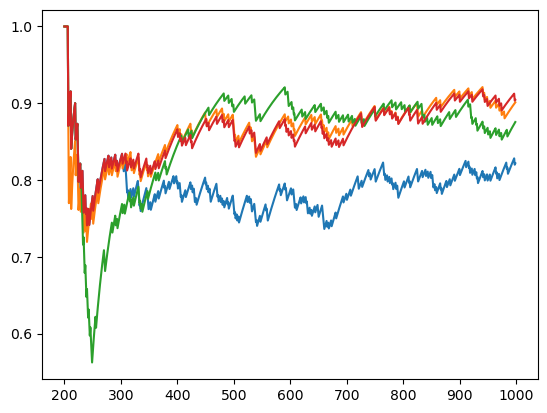

In [70]:
acc_fading_factor = 0.99
for adapt_method in adapt_methods:
    if adapt_method == '':
        model_adapt_name = model_names[1]
        df = pd.read_csv(f'{base_dir}{model_names_all}/{filename}')
    else:
        model_adapt_name = f'{model_names[1]}_{adapt_method}'
        df = pd.read_csv(f'{base_dir}{model_names_all}_{adapt_method}/{filename}')
    
    if acc_fading_factor == 1:
        mean_acc = df[f'mean_acc_[{model_names[1]}]']
    else:
        mean_acc = df[f'mean_acc_{acc_fading_factor}_fading_[{model_names[1]}]']
    
    plt.plot(df['id'], mean_acc, label=model_adapt_name)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0, 0.5, 'Classification accuracy')

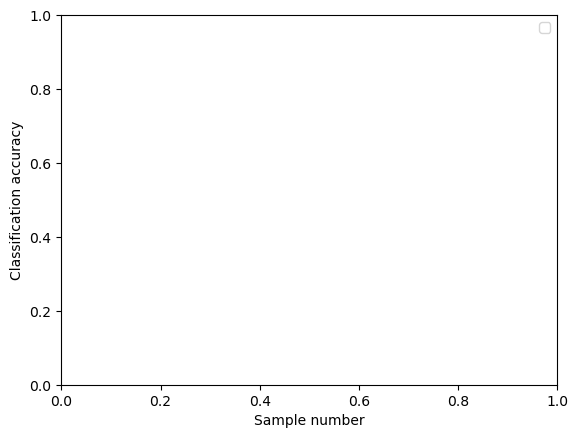

In [71]:
if len(adapt_methods) > 1:
    plt.legend(loc='upper right')
plt.xlabel('Sample number')
plt.ylabel('Classification accuracy')

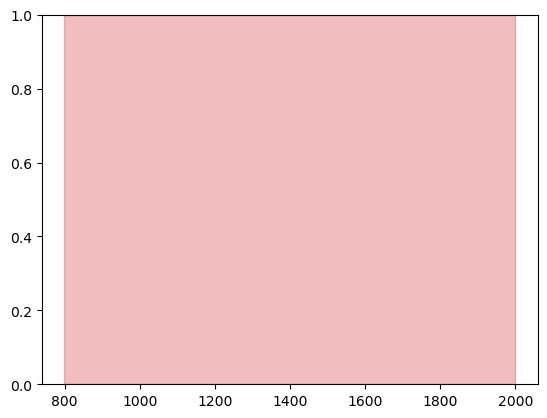

In [72]:
if drift_type == 'sudden':
    for drift_point in drift_points:
        plt.axvline(drift_point, color='red', linestyle='--')
elif drift_type == 'gradual':
    drift_range = np.zeros(2)
    for index, drift_point in enumerate(drift_points):
        drift_range[index % 2] = drift_point
        if index % 2 == 1:
            plt.axvspan(drift_range[0], drift_range[1], color='tab:red', alpha=0.3)
elif drift_type == 'incremental':
    drift_range = np.array([drift_points[0], len(df)])
    plt.axvspan(drift_range[0], drift_range[1], color='tab:red', alpha=0.3)

In [73]:
plt.show()

In [68]:
    for adapt_method in adapt_methods:
        if adapt_method == '':
            model_adapt_name = model_name
            df = pd.read_csv(f'{base_dir}{model_names_all}/{filename}')
        else:
            model_adapt_name = f'{model_name}_{adapt_method}'
            df = pd.read_csv(f'{base_dir}{model_names_all}_{adapt_method}/{filename}')
        
        if acc_fading_factor == 1:
            mean_acc = df[f'mean_acc_[{model_name}]']
        else:
            mean_acc = df[f'mean_acc_{acc_fading_factor}_fading_[{model_name}]']    
                              
        plt.plot(df['id'],mean_acc, label = model_adapt_name)

KeyError: 'mean_acc_0.99_fading_[ARF]'

In [66]:
print(df.columns)

Index(['id', 'mean_acc_[NB]', 'current_acc_[NB]', 'mean_acc_[HT]',
       'current_acc_[HT]', 'mean_kappa_[NB]', 'current_kappa_[NB]',
       'mean_kappa_[HT]', 'current_kappa_[HT]', 'mean_recall_[NB]',
       'current_recall_[NB]', 'mean_recall_[HT]', 'current_recall_[HT]',
       'mean_f1_[NB]', 'current_f1_[NB]', 'mean_f1_[HT]', 'current_f1_[HT]',
       'mean_acc_0.99_fading_[NB]', 'mean_acc_0.99_fading_[HT]'],
      dtype='object')


In [81]:
if __name__ == '__main__':
    base_dir = 'log/synthetic/dangerous_driving/gradual_correlation_drift/'
    # base_dir = 'log/synthetic/sin_function/incremental_correlation_drift/'
    
    # base_dir = 'log/real-world/airlines/'
    # base_dir = 'log/real-world/electricity/'
    # base_dir = 'log/real-world/poker_hand/'
    
    filename_list = ['predict_stream_1.csv','predict_stream_2.csv','predict_stream_3.csv','predict_stream_all.csv']
    
    # filename_list = ['predict_stream_1.csv','predict_stream_2.csv','predict_stream_3.csv','predict_stream_4.csv', 'predict_stream_5.csv','predict_stream_6.csv','predict_stream_7.csv','predict_stream_8.csv','predict_stream_9.csv']
    # filename_list = ['predict_stream_1.csv','predict_stream_2.csv','predict_stream_3.csv','predict_stream_4.csv', 'predict_stream_5.csv','predict_stream_6.csv','predict_stream_7.csv']
    # filename_list = ['predict_stream_1.csv','predict_stream_2.csv','predict_stream_3.csv','predict_stream_4.csv','predict_stream_all.csv']
    
    acc_fading_factors = np.array([1,0.99])
    
    drift_type = 'gradual'
    
    # drift_points = np.array([5000])
    # drift_points = np.array([4000,6000])
    drift_points = np.array([2000])
    
    # drift_points = np.array([420.0,800.0])
    # drift_points = np.array([1180.0,1660.0])
    # drift_points = np.array([3870,5710,8196,9476])


    adapt_methods = ['','passive_adapt','CDDM_adapt_reset','CDDM_adapt_noreset']
    
    model_names = ['NB','HT']
    model_names_all = print_model_names(['NB','HT'])
    
#     for filename in filename_list:
#         for model_name in model_names:
#             for acc_fading_factor in acc_fading_factors:
#                 for adapt_method in adapt_methods:
#                     plot_predict_stream(base_dir, model_names_all, filename, model_name, acc_fading_factor, drift_points, drift_type, [adapt_method])
#                 plot_predict_stream(base_dir, model_names_all, filename, model_name, acc_fading_factor, drift_points, drift_type, adapt_methods)
                
                
                
    for filename in filename_list:
        for model_name in model_names:
            for acc_fading_factor in acc_fading_factors:
                for adapt_method in adapt_methods:
                    try:
                        plot_predict_stream(base_dir, model_names_all, filename, model_name, acc_fading_factor, drift_points, drift_type, [adapt_method])
                    except FileNotFoundError:
                        print(f"File {filename} not found, skipping...")
                        continue
                try:
                    plot_predict_stream(base_dir, model_names_all, filename, model_name, acc_fading_factor, drift_points, drift_type, adapt_methods)
                except FileNotFoundError:
                    print(f"File {filename} not found, skipping...")
                    continue

File predict_stream_1.csv not found, skipping...
File predict_stream_1.csv not found, skipping...
File predict_stream_1.csv not found, skipping...
File predict_stream_1.csv not found, skipping...
File predict_stream_1.csv not found, skipping...
File predict_stream_1.csv not found, skipping...
File predict_stream_1.csv not found, skipping...
File predict_stream_1.csv not found, skipping...
File predict_stream_1.csv not found, skipping...
File predict_stream_1.csv not found, skipping...
File predict_stream_1.csv not found, skipping...
File predict_stream_1.csv not found, skipping...
File predict_stream_1.csv not found, skipping...
File predict_stream_1.csv not found, skipping...
File predict_stream_1.csv not found, skipping...
File predict_stream_1.csv not found, skipping...
File predict_stream_1.csv not found, skipping...
File predict_stream_1.csv not found, skipping...
File predict_stream_1.csv not found, skipping...
File predict_stream_1.csv not found, skipping...
File predict_stream_

In [74]:
def plot_predict_stream(base_dir, model_names_all, filename, model_name, acc_fading_factor, drift_points, drift_type='sudden', adapt_methods = ['']):   

    # accuracy
    for adapt_method in adapt_methods:
        if adapt_method == '':
            model_adapt_name = model_name
            df = pd.read_csv(f'{base_dir}{model_names_all}/{filename}')
        else:
            model_adapt_name = f'{model_name}_{adapt_method}'
            df = pd.read_csv(f'{base_dir}{model_names_all}_{adapt_method}/{filename}')
        
        if acc_fading_factor == 1:
            mean_acc = df[f'mean_acc_[{model_name}]']
        else:
            mean_acc = df[f'mean_acc_{acc_fading_factor}_fading_[{model_name}]']    
                              
        plt.plot(df['id'],mean_acc, label = model_adapt_name)
        
    if len(adapt_methods) > 1:
        plt.legend(loc='upper right')
    plt.xlabel('Sample number')
    plt.ylabel('Classification accuracy')

    # drift region
    if drift_type =='sudden':
        for drift_point in drift_points:
            plt.axvline(drift_point,color='red',linestyle='--')
    elif drift_type == 'gradual':
        drift_range = np.zeros(2)
        for index, drift_point in enumerate(drift_points):
            drift_range[index % 2] = drift_point
            if index % 2==1:
                plt.axvspan(drift_range[0],drift_range[1],color='tab:red',alpha=0.3)
    elif drift_type == 'incremental':
        drift_range = np.array([drift_points[0], len(df)])
        plt.axvspan(drift_range[0],drift_range[1],color='tab:red',alpha=0.3)
    
    
    middle_dir = base_dir.split('/',1)[-1]
    filename_without_abbr = filename.split('.')[0]
        
    if len(adapt_methods) == 1:
        if adapt_methods[0] == '':
            output_folder = f'result/{middle_dir}{model_name}/'
        else:
            output_folder = f'result/{middle_dir}{model_name}_{adapt_methods[0]}/'
    else:
        output_folder = f'result/{middle_dir}{model_name}_all/'
        
    output_folder = f'{output_folder}fading_{acc_fading_factor}/'
    output_file = f'{output_folder}{filename_without_abbr}.png'
               
    path = Path(output_folder)    
    path.mkdir(parents=True, exist_ok=True)       
               
    plt.savefig(output_file,dpi=600)
    # plt.show()
    plt.close()
    
if __name__ == '__main__':
    # base_dir = "log/synthetic/dangerous_driving/gradual_correlation_drift/"
    base_dir = '/log/synthetic/sin_function/incremental_correlation_drift/'
    
    # base_dir = 'log/real-world/airlines/'
    # base_dir = 'log/real-world/electricity/'
    # base_dir = 'log/real-world/poker_hand/'
    
    filename_list = ['predict_stream_1.csv','predict_stream_2.csv','predict_stream_3.csv','predict_stream_all.csv']
    
    # filename_list = ['predict_stream_1.csv','predict_stream_2.csv','predict_stream_3.csv','predict_stream_4.csv', 'predict_stream_5.csv','predict_stream_6.csv','predict_stream_7.csv','predict_stream_8.csv','predict_stream_9.csv']
    # filename_list = ['predict_stream_1.csv','predict_stream_2.csv','predict_stream_3.csv','predict_stream_4.csv', 'predict_stream_5.csv','predict_stream_6.csv','predict_stream_7.csv']
    # filename_list = ['predict_stream_1.csv','predict_stream_2.csv','predict_stream_3.csv','predict_stream_4.csv','predict_stream_all.csv']
    
    acc_fading_factors = np.array([1,0.99,0.999])
    
    drift_type = 'incremental'
    
    # drift_points = np.array([5000])
    # drift_points = np.array([4000,6000])
    drift_points = np.array([2000])
    
    # drift_points = np.array([420.0,800.0])
    # drift_points = np.array([1180.0,1660.0])
    # drift_points = np.array([3870,5710,8196,9476])


    adapt_methods = ['','passive_adapt','CDDM_adapt_reset','CDDM_adapt_noreset']
    
    model_names = ['NB','HT']
    model_names_all = print_model_names(['NB','HT'])
  

In [3]:
import numpy as np
import pandas as pd


import sys
import os

# 获取当前工作目录路径
current_dir = os.getcwd()

# 添加 predict 目录到 Python 解释器的搜索路径中
predict_dir = os.path.join(current_dir, 'predict')
sys.path.append(predict_dir)


from skmultiflow.data.file_stream import FileStream
from skmultiflow.evaluation import EvaluatePrequential

from model import init_models, print_model_names
from evaluate import evaluate, fading_accuracy, get_evaluation_mean_performance

from pathlib import Path
from utils import remove_comments

from collections import deque
from sklearn.tree import DecisionTreeClassifier

In [86]:
def predict_stream_with_sliding_window(base_dir, filename, model_names, window_size=200, fading_factors=np.array([0.99])):
    model_name_all = print_model_names(model_names)
    
    output_folder = f'{base_dir}{model_name_all}_sliding_window/'
    path = Path(output_folder)
    path.mkdir(parents=True, exist_ok=True)
    output_file = f'{output_folder}predict_{filename}'
    
    stream = FileStream(f'{base_dir}{filename}')
    models = init_models(model_names)
    
    evaluator = EvaluatePrequential(n_wait=1, max_samples=10000, pretrain_size=200, metrics=['accuracy','kappa','recall','f1'], show_plot=False, output_file=output_file)
    
    window = deque(maxlen=window_size)  # Initialize window
    
    while stream.has_more_samples():
        X, y = stream.next_sample()
        
        window.append((X, y))
        
        # Start predicting once window size reaches window_size
        if len(window) == window_size:
            X_window, y_window = zip(*window)
            evaluate(evaluator=evaluator, stream=(X_window, y_window), model=models, model_names=model_names, need_adapt=False)  # Assuming the evaluate function can take a window of samples
            
    remove_comments(output_file)
    
    # Add mean accuracy with fading factor
    df = pd.read_csv(output_file)
    for model_name in model_names:
        cur_accuracy = df[f'current_acc_[{model_name}]']
        for fading_factor in fading_factors:
            df[f'mean_acc_{fading_factor}_fading_[{model_name}]'] = fading_accuracy(cur_accuracy, fading_factor)  # Assuming fading_accuracy is defined
    
    df.to_csv(output_file, index=0)
    
    return get_evaluation_mean_performance(evaluator)  # Assuming this function is defined

In [116]:
def predict_stream_with_sliding_window(base_dir, filename, model_names, window_size=1000):
    model_name_all = print_model_names(model_names)
    
    output_folder = f'{base_dir}{model_name_all}_sliding_window/'
    path = Path(output_folder)
    path.mkdir(parents=True, exist_ok=True)
    output_file = f'{output_folder}predict_{filename}'
    
    stream = FileStream(f'{base_dir}{filename}')
    models = init_models(model_names)
    evaluator = EvaluatePrequential(
        n_wait=1,
        max_samples=10000,
        pretrain_size=200,
        metrics=['accuracy', 'kappa', 'recall', 'f1'],
        show_plot=False,
        output_file=output_file
    )
    
    # Evaluate the models using the stream
    evaluator.evaluate(stream=stream, model=models, model_names=model_names)
    remove_comments(output_file)
    # ... (Post-processing like removing comments and adding mean_accuracy)
    # Add mean_accuracy with fading factor
    df = pd.read_csv(output_file)
    for model_name in model_names:
        cur_accuracy = df[f'current_acc_[{model_name}]']
        for fading_factor in fading_factors:
            df[f'mean_acc_{fading_factor}_fading_[{model_name}]'] = fading_accuracy(cur_accuracy, fading_factor)
    df.to_csv(output_file, index=False)
    return get_evaluation_mean_performance(evaluator)  # Assuming this function gathers the mean performance

In [2]:
def predict_stream_with_sliding_window(base_dir, filename, model_names, window_size=1000):
    model_name_all = print_model_names(model_names)
    
    output_folder = f'{base_dir}{model_name_all}_sliding_window/'
    path = Path(output_folder)
    path.mkdir(parents=True, exist_ok=True)
    output_file = f'{output_folder}predict_{filename}'
    
    stream = FileStream(f'{base_dir}{filename}')
    models = init_models(model_names)
    evaluator = EvaluatePrequential(
        n_wait=1,
        max_samples=10000,
        pretrain_size=200,
        metrics=['accuracy', 'kappa', 'recall', 'f1'],
        show_plot=False,
        output_file=output_file
    )
    
    detected_drift_points = np.array([500])  # Modify this with the actual detected drift points
    models = {}  # 使用字典存储模型
    for model_name in model_names:
        models[model_name] = init_models(model_name) 
    if i in detected_drift_points:
    # Adapt the model using the samples in the sliding window
        for model_name in model_names:
            models[model_name] = adapt_model(models[model_name], stream.X[i - window_size:i], stream.y[i - window_size:i])
        # Evaluate the models using the current sample
            evaluator.evaluate(stream=stream, model=models, model_names=model_names)
    
    remove_comments(output_file)
    # ... (Post-processing like removing comments and adding mean_accuracy)
    # Add mean_accuracy with fading factor
    df = pd.read_csv(output_file)
    for model_name in model_names:
        cur_accuracy = df[f'current_acc_[{model_name}]']
        for fading_factor in fading_factors:
            df[f'mean_acc_{fading_factor}_fading_[{model_name}]'] = fading_accuracy(cur_accuracy, fading_factor)
    df.to_csv(output_file, index=False)
    return get_evaluation_mean_performance(evaluator)  # Assuming this function gathers the mean performance


In [2]:
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt

# ... (Your other functions like init_models, print_model_names, etc.)

def plot_accuracy_over_time(df, model_names, fading_factors, output_folder):
    for model_name in model_names:
        plt.figure()
        for fading_factor in fading_factors:
            col_name = f'mean_acc_{fading_factor}_fading_[{model_name}]'
            plt.plot(df['id'], df[col_name], label=f'Fading Factor = {fading_factor}')
        plt.xlabel('Sample number')
        plt.ylabel('Mean Accuracy')
        plt.title(f'Mean Accuracy over Time - {model_name}')
        plt.legend()
        plt.savefig(f'{output_folder}mean_accuracy_{model_name}.png')
        plt.close()
def predict_stream_with_sliding_window(base_dir, filename, model_names,  window_size=200, fading_factors=np.array([0.99])):
    model_name_all = print_model_names(model_names)
    
    output_folder = f'{base_dir}{model_name_all}_sliding_window/'
    path = Path(output_folder)
    path.mkdir(parents=True, exist_ok=True)
    output_file = f'{output_folder}predict_{filename}'
    
    stream = FileStream(f'{base_dir}{filename}')
    models = init_models(model_names)
    evaluator = EvaluatePrequential(
        n_wait=1,
        max_samples=10000,
        pretrain_size=200,
        metrics=['accuracy', 'kappa', 'recall', 'f1'],
        show_plot=False,
        output_file=output_file
    )
    
    detected_drift_points =  np.array([500])  # Find drift points using your detection method
    
    for i in range(len(stream.y)):
        try:
        # Adapt the model using the samples in the sliding window if a drift point is detected
            if i in detected_drift_points:
                for model_name in model_names:
                    model_idx = model_names.index(model_name)  # Find index of the model in the model_names list
                    models[model_idx] = adapt_model(models[model_idx], stream.X[i - window_size:i], stream.y[i - window_size:i])
        
        # Evaluate the models using the current sample
            evaluator.evaluate(stream=stream, model=models, model_names=model_names)
        except TypeError as e:
            print(f"An error occurred at iteration {i}: {e}")
            continue
        
    
    remove_comments(output_file)
    # ... (Post-processing like removing comments and adding mean_accuracy)
    
    df = pd.read_csv(output_file)
    for model_name in model_names:
        cur_accuracy = df[f'current_acc_[{model_name}]']
        for fading_factor in fading_factors:
            df[f'mean_acc_{fading_factor}_fading_[{model_name}]'] = fading_accuracy(cur_accuracy, fading_factor)
    df.to_csv(output_file, index=False)
    
    plot_accuracy_over_time(df, model_names, fading_factors, output_folder)

    return get_evaluation_mean_performance(evaluator)

In [8]:
def predict_stream_with_passive_adapt(base_dir, filename, model_names, fading_factors=np.array([0.99])):
    model_name_all = print_model_names(model_names)
    
    output_folder = f'{base_dir}{model_name_all}_passive_adapt/'
    path = Path(output_folder)
    path.mkdir(parents=True, exist_ok=True)
    output_file = f'{output_folder}predict_{filename}'
    
    stream = FileStream(f'{base_dir}{filename}')
    models = init_models(model_names)
    evaluator = EvaluatePrequential(n_wait=1, max_samples = 10000, pretrain_size=200, metrics=['accuracy','kappa','recall','f1'],show_plot=False,output_file=output_file)
    evaluator.evaluate(stream=stream, model=models,model_names=model_names)
    
    remove_comments(output_file)
    
    # add mean_accuracy with fading factor
    df = pd.read_csv(output_file)
    for model_name in model_names:
        cur_accuracy = df[f'current_acc_[{model_name}]']
        for fading_factor in fading_factors:
            df[f'mean_acc_{fading_factor}_fading_[{model_name}]'] = fading_accuracy(cur_accuracy,fading_factor)
    df.to_csv(output_file, index=0)
    plot_accuracy_over_time(df, model_names, fading_factors, output_folder)
    return get_evaluation_mean_performance(evaluator)

In [55]:
def predict_stream_with_active_adapt(base_dir, filename, model_names, detect_drift_method_name, detected_drift_points, retrain_num = 200, reset=True, fading_factors=np.array([0.99])):
    model_name_all = print_model_names(model_names)
    
    if reset:
        output_folder = f'{base_dir}{model_name_all}_{detect_drift_method_name}_adapt_reset/'
    else:
        output_folder = f'{base_dir}{model_name_all}_{detect_drift_method_name}_adapt_noreset/'
    path = Path(output_folder)
    path.mkdir(parents=True, exist_ok=True)
    output_file = f'{output_folder}predict_{filename}'
    
    stream = FileStream(f'{base_dir}{filename}')
    models = init_models(model_names)
    
    evaluator = EvaluatePrequential(n_wait=1, max_samples = 10000, pretrain_size=200, metrics=['accuracy','kappa','recall','f1'], show_plot=False,output_file=output_file)
    
    evaluate(evaluator=evaluator, stream=stream,model=models,model_names=model_names, need_adapt=True, detected_drift_points=detected_drift_points, retrain_num = retrain_num, reset=reset)
    
    remove_comments(output_file)
    
    # add mean_accuracy with fading factor
    df = pd.read_csv(output_file)
    for model_name in model_names:
        cur_accuracy = df[f'current_acc_[{model_name}]']
        for fading_factor in fading_factors:
            df[f'mean_acc_{fading_factor}_fading_[{model_name}]'] = fading_accuracy(cur_accuracy,fading_factor)
    df.to_csv(output_file, index=0)
    plot_accuracy_over_time(df, model_names, fading_factors, output_folder)
    return get_evaluation_mean_performance(evaluator)

In [4]:
def predict_stream(base_dir, filename, model_names, fading_factors=np.array([0.99])):
    model_name_all = print_model_names(model_names)
    
    output_folder = f'{base_dir}{model_name_all}'
    path = Path(output_folder)
    path.mkdir(parents=True, exist_ok=True)   
    output_file = f'{output_folder}/predict_{filename}'
    
    stream = FileStream(f'{base_dir}{filename}')
    models = init_models(model_names)
    evaluator = EvaluatePrequential(n_wait=1, max_samples = 10000, pretrain_size=200, metrics=['accuracy','kappa','recall','f1'],show_plot=False,output_file=output_file)
    evaluate(evaluator, stream, models, model_names, need_adapt=False)
    
    remove_comments(output_file)
    
    # add mean_accuracy with fading factor
    df = pd.read_csv(output_file)
    for model_name in model_names:
        cur_accuracy = df[f'current_acc_[{model_name}]']
        for fading_factor in fading_factors:
            df[f'mean_acc_{fading_factor}_fading_[{model_name}]'] = fading_accuracy(cur_accuracy,fading_factor)
    df.to_csv(output_file,index=0)    
    plot_accuracy_over_time(df, model_names, fading_factors, output_folder)
    return get_evaluation_mean_performance(evaluator)

In [3]:
from skmultiflow.bayes import NaiveBayes
from skmultiflow.trees import HoeffdingTreeClassifier, HoeffdingAdaptiveTreeClassifier
from skmultiflow.lazy import KNNClassifier
from skmultiflow.meta import AdaptiveRandomForestClassifier

def init_models(model_names):
    models = list()
    for model_name in model_names:
        if model_name == 'NB':
            model = NaiveBayes()
        elif model_name == 'HT':
            model = HoeffdingTreeClassifier()
        elif model_name == 'HAT':
            model = HoeffdingAdaptiveTreeClassifier()
        elif model_name == 'KNN':
            model = KNNClassifier()
        elif model_name == 'ARF':
            model = AdaptiveRandomForestClassifier()
        else:
            model = None
        models.append(model)
    return models

def print_model_names(model_names):
    model_name_all = ''
    for model_name in model_names:
        model_name_all = model_name_all + model_name + '_'
    return model_name_all[:-1]

In [109]:
def update_models(models, window_buffer_X, window_buffer_y):
    updated_models = []
    for model, X, y in zip(models, window_buffer_X, window_buffer_y):
        model.partial_fit(X, y)  # Update the model with new data
        updated_models.append(model)
    return updated_models

In [1]:
def adapt_model(model, X, y):
    # Assuming model is a scikit-learn classifier
    # X and y are the samples and labels in the sliding window
    
    # Fit the model to the new data
    model.fit(X, y)
    
    return model

In [7]:
from skmultiflow.evaluation.evaluate_prequential import EvaluatePrequential
if __name__ == '__main__':
    #base_dir = 'log/synthetic/dangerous_driving/sudden_correlation_drift/'
    #base_dir = 'log/synthetic/dangerous_driving/gradual_correlation_drift/'
    #base_dir = 'log/synthetic/dangerous_driving/incremental_correlation_drift/'
    
    base_dir = 'log/synthetic/sin_function/sudden_correlation_drift/'
    #base_dir = 'log/synthetic/sin_function/gradual_correlation_drift/'
    # base_dir = 'log/synthetic/sin_function/incremental_correlation_drift/'
    
    # base_dir = 'log/real-world/poker_hand/'
    # base_dir = 'log/real-world/electricity/'
    # base_dir = 'log/real-world/airlines/'
    
    filename = 'stream_all.csv'
    
    model_names = ['NB','HT']
    
    #model_names = ['NB','HAT','ARF']

    detect_drift_method_name = 'CDDM'
        
    detected_drift_points = np.array([500])
    # detected_drift_points = np.array([410])
    # detected_drift_points = np.array([560])
    
    # detected_drift_points = np.array([500])
    # detected_drift_points = np.array([410])
    # detected_drift_points = np.array([230])
    
    # detected_drift_points = np.array([590.0,  890.0, 1270.0, 2010.0, 2550.0])
    # detected_drift_points = np.array([270.0, 1090.0, 1330.0, 1690.0, 2463.0])
    # detected_drift_points = np.array([1050.0,4350.0])
    
    #predict_stream_with_sliding_window(base_dir,filename, model_names)
    predict_stream(base_dir, filename, model_names, fading_factors=np.array([0.99]))
    #predict_stream_with_active_adapt(base_dir, filename, model_names, detect_drift_method_name, detected_drift_points, retrain_num = 100, reset=True, fading_factors=np.array([0.99]))

Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 200 sample(s).
Evaluating...
 #################### [100%] [0.11s]
Processed samples: 999
Mean performance:
NB - Accuracy     : 0.9287
NB - Kappa        : 0.8573
NB - Recall: 0.9250
NB - F1 score: 0.9285
HT - Accuracy     : 0.9287
HT - Kappa        : 0.8573
HT - Recall: 0.9250
HT - F1 score: 0.9285


Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 200 sample(s).
Evaluating...
 #################### [100%] [0.10s]
Processed samples: 999
Mean performance:
NB - Accuracy     : 0.7922
NB - Kappa        : 0.5843
NB - Recall: 0.7702
NB - F1 score: 0.7861
HT - Accuracy     : 0.7922
HT - Kappa        : 0.5843
HT - Recall: 0.7702
HT - F1 score: 0.7861


<IPython.core.display.Javascript object>


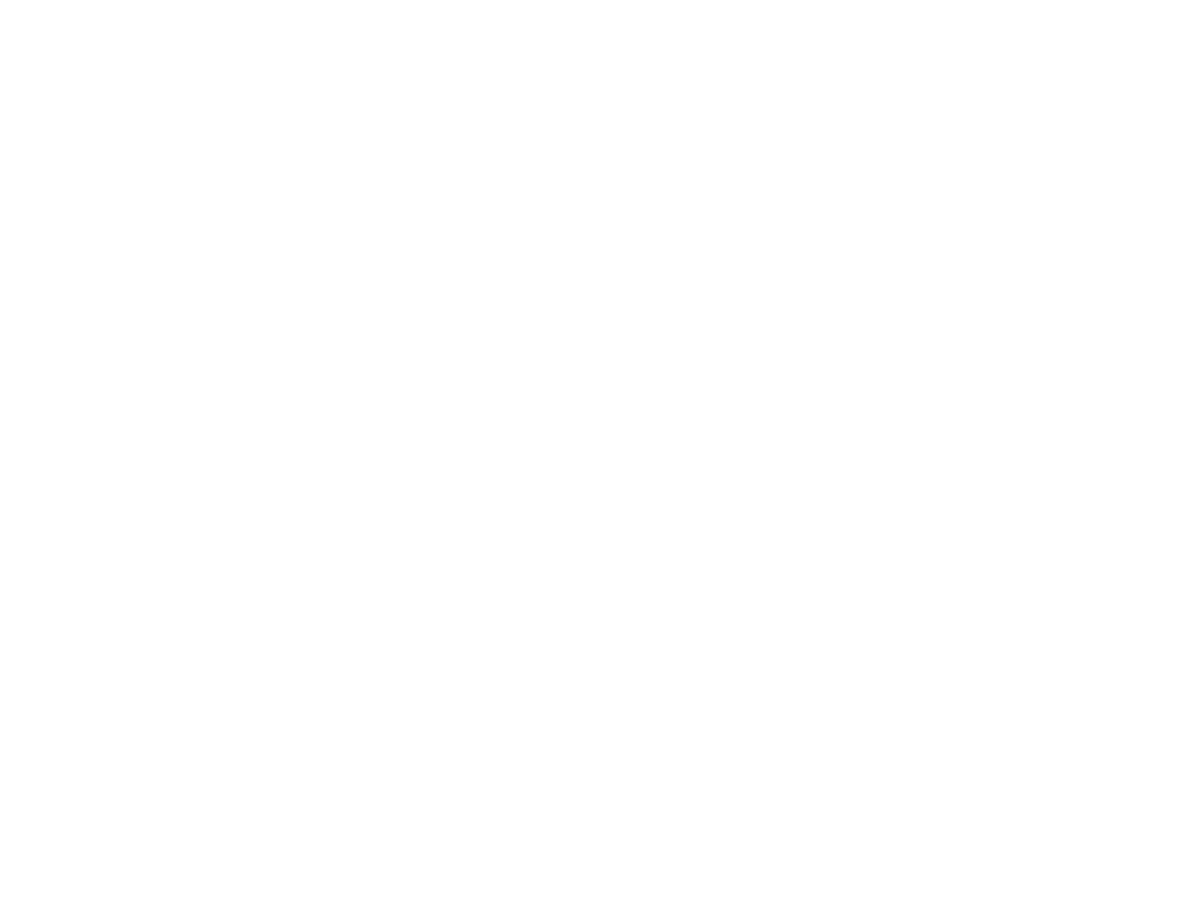

<IPython.core.display.Javascript object>


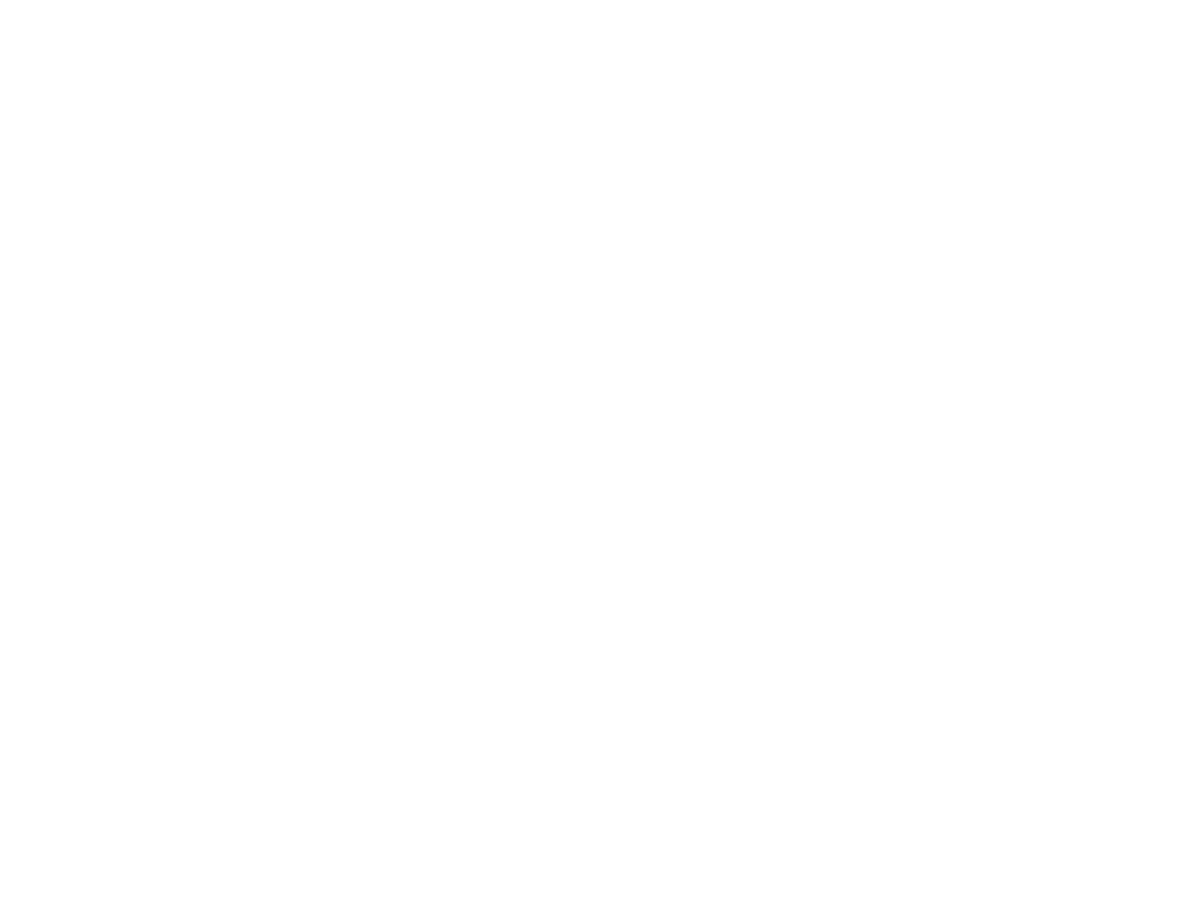

Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 200 sample(s).
Evaluating...
 #################### [100%] [0.15s]
Processed samples: 999
Mean performance:
NB - Accuracy     : 0.8748
NB - Kappa        : 0.7497
NB - Recall: 0.8712
NB - F1 score: 0.8734
HT - Accuracy     : 0.8748
HT - Kappa        : 0.7497
HT - Recall: 0.8712
HT - F1 score: 0.8734


<IPython.core.display.Javascript object>


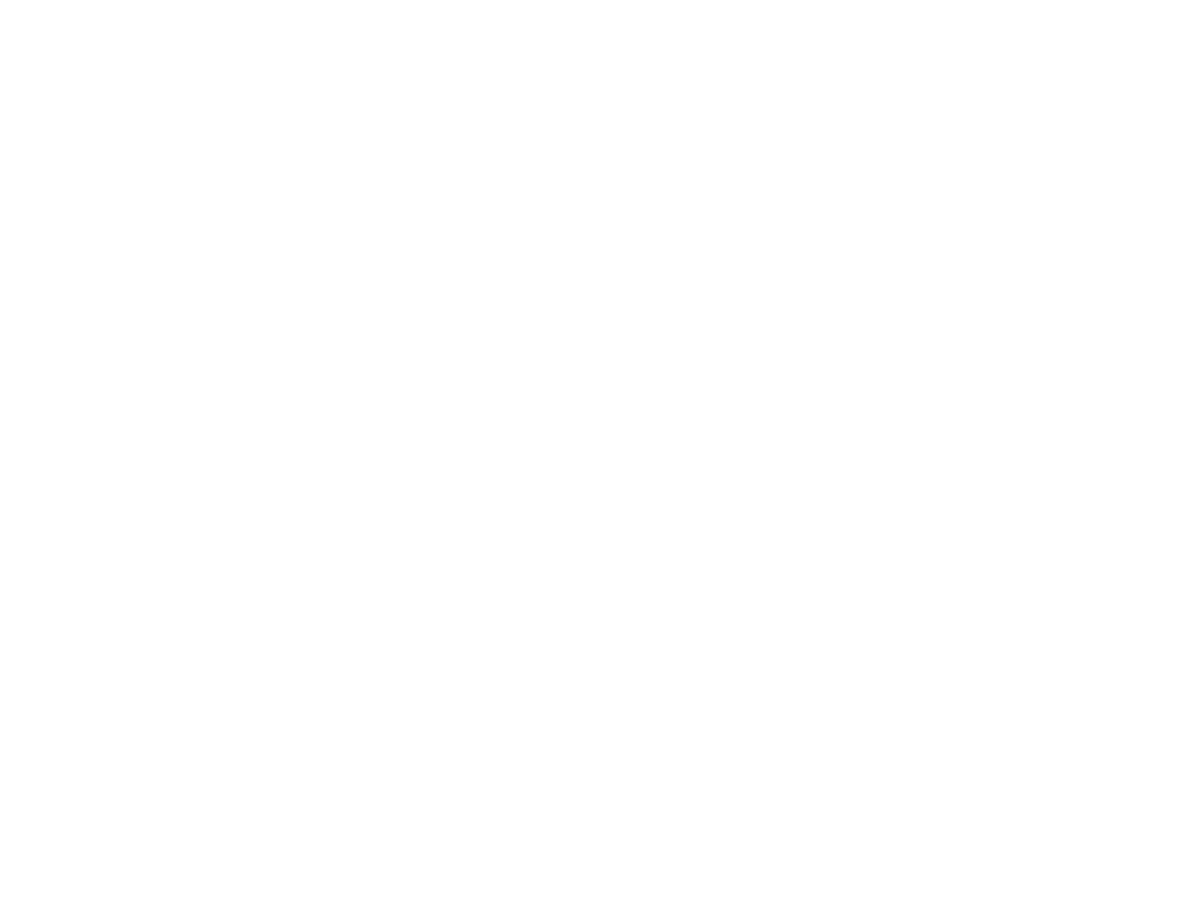

<IPython.core.display.Javascript object>


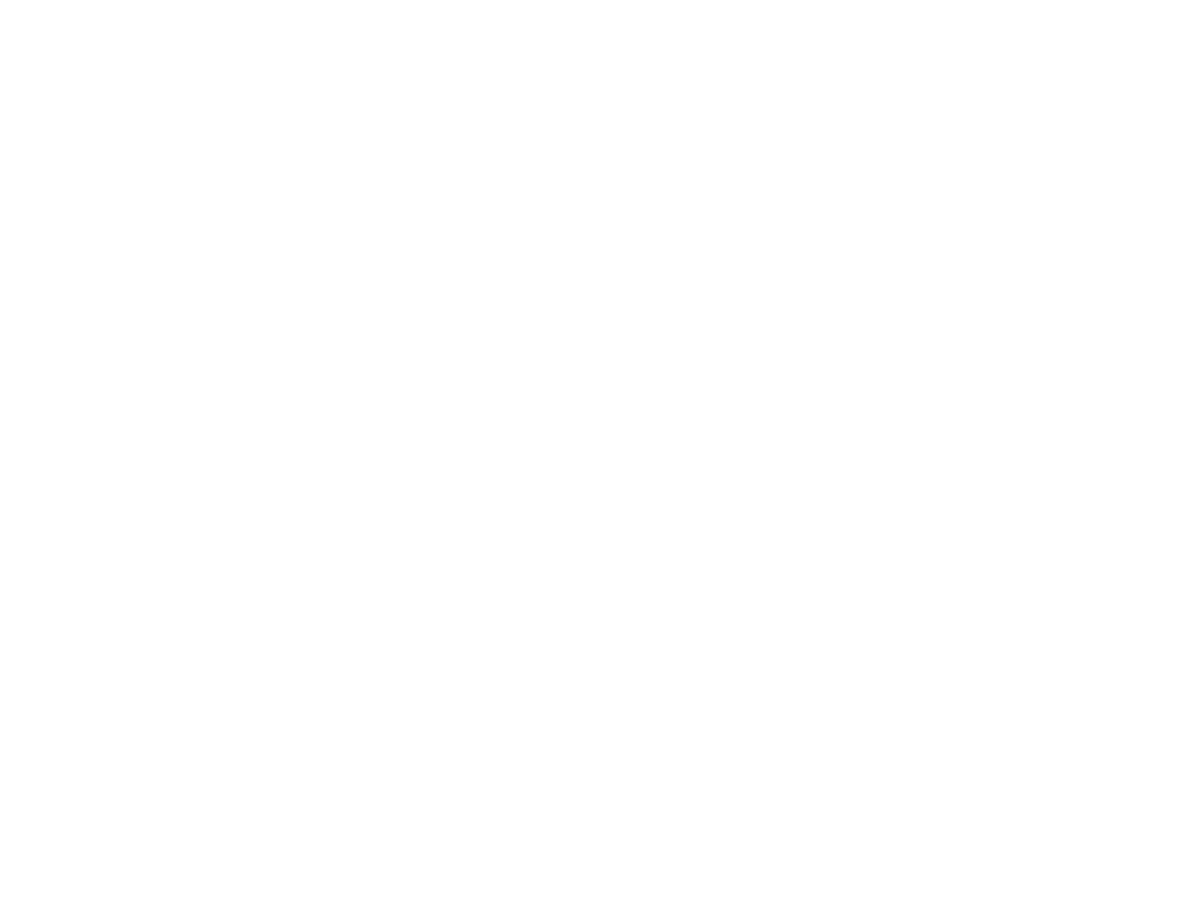

Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 200 sample(s).
Evaluating...
 #################### [100%] [0.13s]
Processed samples: 999
Mean performance:
NB - Accuracy     : 0.8723
NB - Kappa        : 0.7446
NB - Recall: 0.8662
NB - F1 score: 0.8706
HT - Accuracy     : 0.8723
HT - Kappa        : 0.7446
HT - Recall: 0.8662
HT - F1 score: 0.8706


<IPython.core.display.Javascript object>


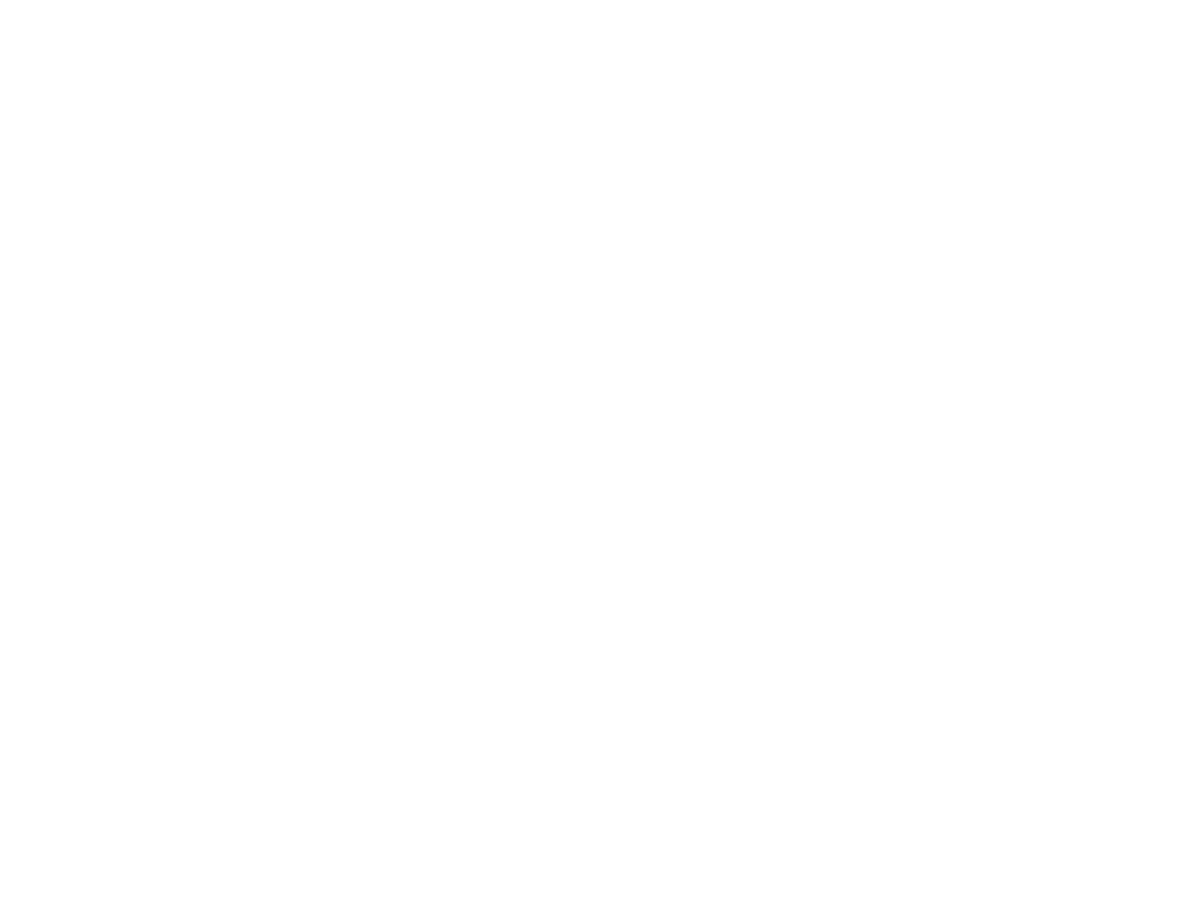

<IPython.core.display.Javascript object>


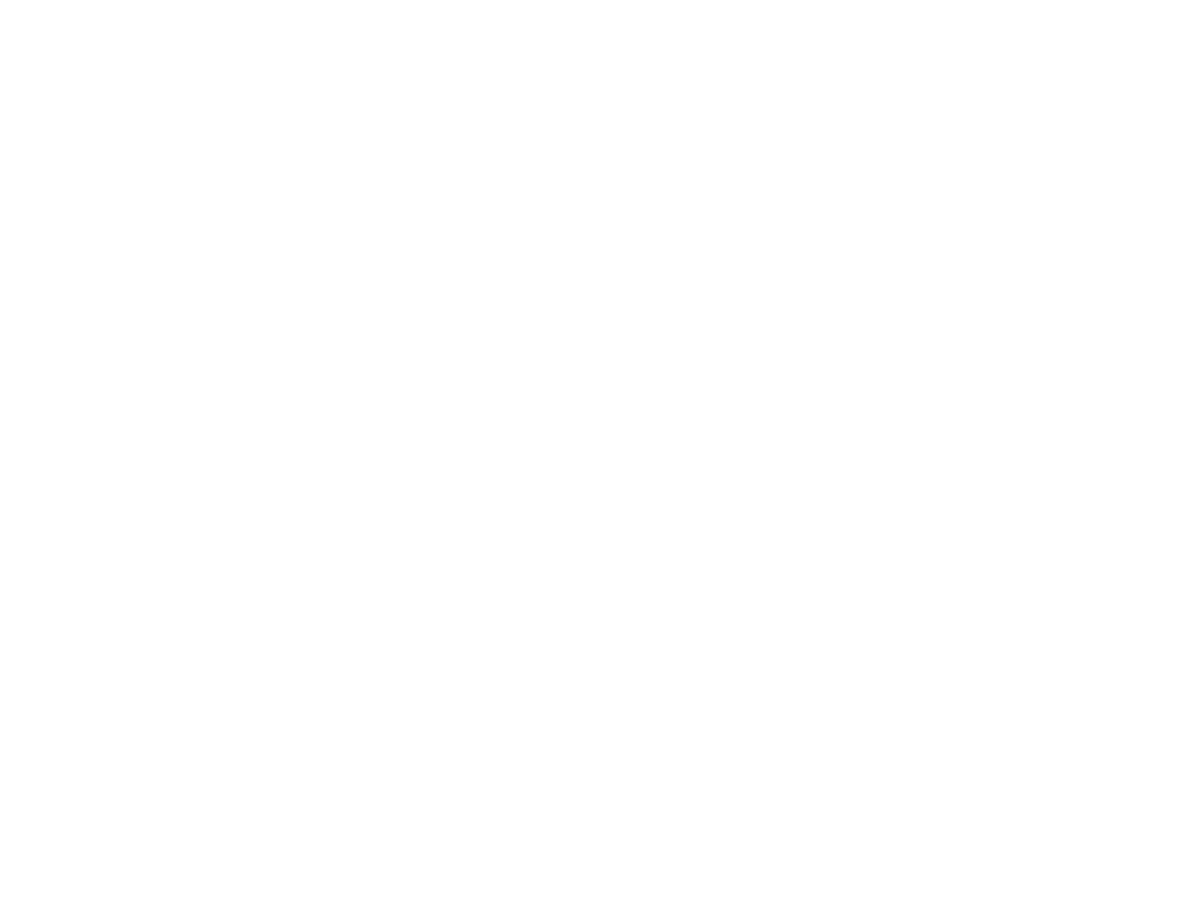

Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 200 sample(s).
Evaluating...
 #################### [100%] [0.12s]
Processed samples: 999
Mean performance:
NB - Accuracy     : 0.8698
NB - Kappa        : 0.7396
NB - Recall: 0.8561
NB - F1 score: 0.8670
HT - Accuracy     : 0.8673
HT - Kappa        : 0.7346
HT - Recall: 0.8510
HT - F1 score: 0.8641


<IPython.core.display.Javascript object>


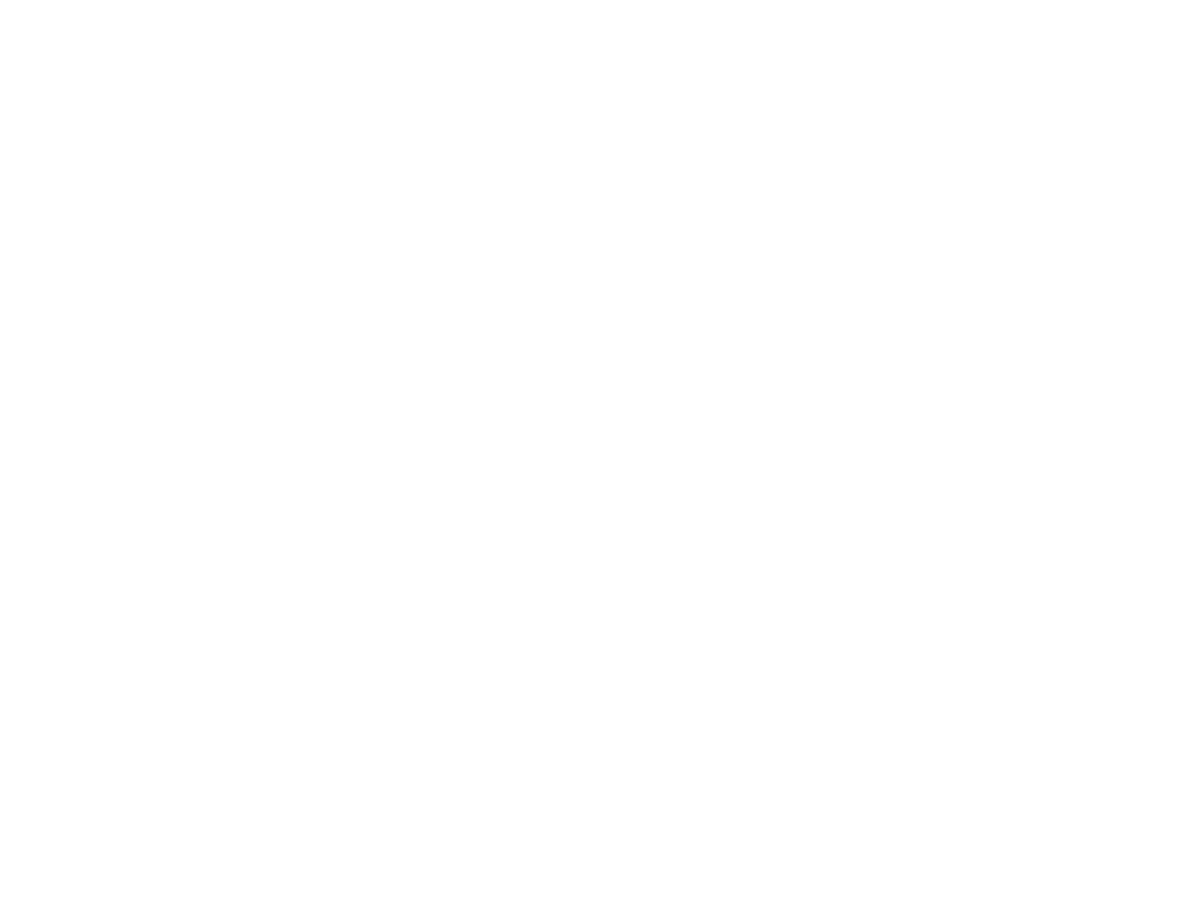

<IPython.core.display.Javascript object>


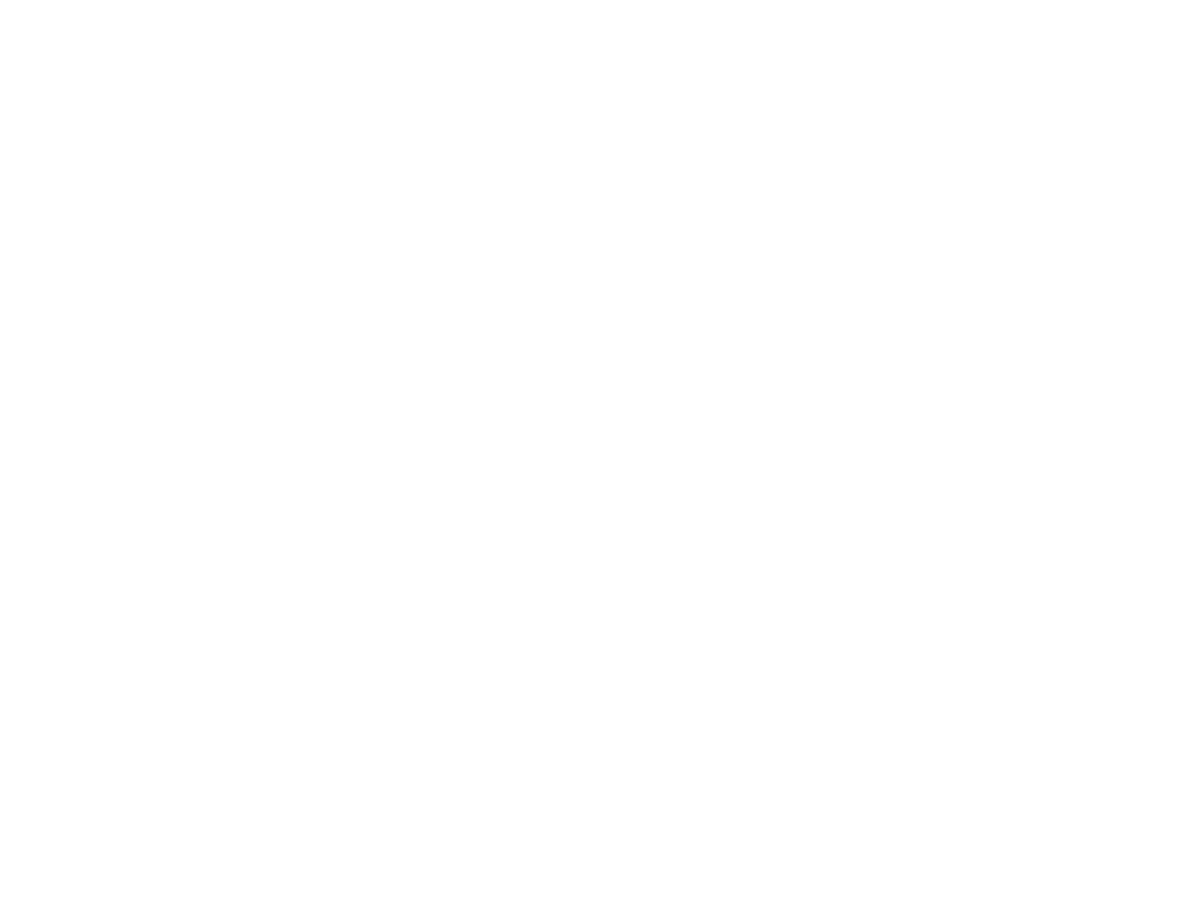

Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 200 sample(s).
Evaluating...
 #################### [100%] [0.17s]
Processed samples: 999
Mean performance:
NB - Accuracy     : 0.8748
NB - Kappa        : 0.7497
NB - Recall: 0.8712
NB - F1 score: 0.8734
HT - Accuracy     : 0.8748
HT - Kappa        : 0.7497
HT - Recall: 0.8712
HT - F1 score: 0.8734
Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 200 sample(s).
Evaluating...
 #################### [100%] [0.18s]
Processed samples: 999
Mean performance:
NB - Accuracy     : 0.8786
NB - Kappa        : 0.7572
NB - Recall: 0.8788
NB - F1 score: 0.8777
HT - Accuracy     : 0.8786
HT - Kappa        : 0.7572
HT - Recall: 0.8788
HT - F1 score: 0.8777
Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 200 sample(s).
Evaluating...
 #################### [100%] [0.17s]
Processed samples: 999
Mean performance:
NB - Accuracy     : 0.8798
NB - Kappa        : 0.7597
NB - Recall: 0.8813
NB - F1 score: 0.8791
HT - Accur

 #################### [100%] [0.18s]
Processed samples: 999
Mean performance:
NB - Accuracy     : 0.8786
NB - Kappa        : 0.7572
NB - Recall: 0.8788
NB - F1 score: 0.8777
HT - Accuracy     : 0.9962
HT - Kappa        : 0.9925
HT - Recall: 0.9975
HT - F1 score: 0.9962
Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 200 sample(s).
Evaluating...
 #################### [100%] [0.13s]
Processed samples: 999
Mean performance:
NB - Accuracy     : 0.8786
NB - Kappa        : 0.7572
NB - Recall: 0.8788
NB - F1 score: 0.8777
HT - Accuracy     : 0.9975
HT - Kappa        : 0.9950
HT - Recall: 1.0000
HT - F1 score: 0.9975
Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 200 sample(s).
Evaluating...
 #################### [100%] [0.13s]
Processed samples: 999
Mean performance:
NB - Accuracy     : 0.8786
NB - Kappa        : 0.7572
NB - Recall: 0.8788
NB - F1 score: 0.8777
HT - Accuracy     : 0.9975
HT - Kappa        : 0.9950
HT - Recall: 1.0000
HT - F1 score: 0.9975
Preque

 #################### [100%] [0.10s]
Processed samples: 999
Mean performance:
NB - Accuracy     : 0.8773
NB - Kappa        : 0.7547
NB - Recall: 0.8788
NB - F1 score: 0.8766
HT - Accuracy     : 0.9975
HT - Kappa        : 0.9950
HT - Recall: 1.0000
HT - F1 score: 0.9975
Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 200 sample(s).
Evaluating...
 #################### [100%] [0.11s]
Processed samples: 999
Mean performance:
NB - Accuracy     : 0.8773
NB - Kappa        : 0.7547
NB - Recall: 0.8788
NB - F1 score: 0.8766
HT - Accuracy     : 0.9975
HT - Kappa        : 0.9950
HT - Recall: 1.0000
HT - F1 score: 0.9975
Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 200 sample(s).
Evaluating...
 #################### [100%] [0.10s]
Processed samples: 999
Mean performance:
NB - Accuracy     : 0.8773
NB - Kappa        : 0.7547
NB - Recall: 0.8788
NB - F1 score: 0.8766
HT - Accuracy     : 0.9975
HT - Kappa        : 0.9950
HT - Recall: 1.0000
HT - F1 score: 0.9975
Preque

 #################### [100%] [0.10s]
Processed samples: 999
Mean performance:
NB - Accuracy     : 0.8773
NB - Kappa        : 0.7547
NB - Recall: 0.8788
NB - F1 score: 0.8766
HT - Accuracy     : 0.9987
HT - Kappa        : 0.9975
HT - Recall: 1.0000
HT - F1 score: 0.9987
Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 200 sample(s).
Evaluating...
 #################### [100%] [0.10s]
Processed samples: 999
Mean performance:
NB - Accuracy     : 0.8773
NB - Kappa        : 0.7547
NB - Recall: 0.8788
NB - F1 score: 0.8766
HT - Accuracy     : 0.9987
HT - Kappa        : 0.9975
HT - Recall: 1.0000
HT - F1 score: 0.9987
Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 200 sample(s).
Evaluating...
 #################### [100%] [0.12s]
Processed samples: 999
Mean performance:
NB - Accuracy     : 0.8773
NB - Kappa        : 0.7547
NB - Recall: 0.8788
NB - F1 score: 0.8766
HT - Accuracy     : 0.9987
HT - Kappa        : 0.9975
HT - Recall: 1.0000
HT - F1 score: 0.9987
Preque

 #################### [100%] [0.12s]
Processed samples: 999
Mean performance:
NB - Accuracy     : 0.8773
NB - Kappa        : 0.7547
NB - Recall: 0.8788
NB - F1 score: 0.8766
HT - Accuracy     : 0.9987
HT - Kappa        : 0.9975
HT - Recall: 1.0000
HT - F1 score: 0.9987
Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 200 sample(s).
Evaluating...
 #################### [100%] [0.11s]
Processed samples: 999
Mean performance:
NB - Accuracy     : 0.8773
NB - Kappa        : 0.7547
NB - Recall: 0.8788
NB - F1 score: 0.8766
HT - Accuracy     : 0.9987
HT - Kappa        : 0.9975
HT - Recall: 1.0000
HT - F1 score: 0.9987
Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 200 sample(s).
Evaluating...
 #################### [100%] [0.12s]
Processed samples: 999
Mean performance:
NB - Accuracy     : 0.8773
NB - Kappa        : 0.7547
NB - Recall: 0.8788
NB - F1 score: 0.8766
HT - Accuracy     : 0.9987
HT - Kappa        : 0.9975
HT - Recall: 1.0000
HT - F1 score: 0.9987
Preque

 #################### [100%] [0.13s]
Processed samples: 999
Mean performance:
NB - Accuracy     : 0.8773
NB - Kappa        : 0.7547
NB - Recall: 0.8788
NB - F1 score: 0.8766
HT - Accuracy     : 0.9987
HT - Kappa        : 0.9975
HT - Recall: 1.0000
HT - F1 score: 0.9987
Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 200 sample(s).
Evaluating...
 #################### [100%] [0.14s]
Processed samples: 999
Mean performance:
NB - Accuracy     : 0.8773
NB - Kappa        : 0.7547
NB - Recall: 0.8788
NB - F1 score: 0.8766
HT - Accuracy     : 0.9987
HT - Kappa        : 0.9975
HT - Recall: 1.0000
HT - F1 score: 0.9987
Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 200 sample(s).
Evaluating...
 #################### [100%] [0.13s]
Processed samples: 999
Mean performance:
NB - Accuracy     : 0.8773
NB - Kappa        : 0.7547
NB - Recall: 0.8788
NB - F1 score: 0.8766
HT - Accuracy     : 0.9987
HT - Kappa        : 0.9975
HT - Recall: 1.0000
HT - F1 score: 0.9987
Preque

 #################### [100%] [0.13s]
Processed samples: 999
Mean performance:
NB - Accuracy     : 0.8773
NB - Kappa        : 0.7547
NB - Recall: 0.8788
NB - F1 score: 0.8766
HT - Accuracy     : 0.9987
HT - Kappa        : 0.9975
HT - Recall: 1.0000
HT - F1 score: 0.9987
Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 200 sample(s).
Evaluating...
 #################### [100%] [0.12s]
Processed samples: 999
Mean performance:
NB - Accuracy     : 0.8773
NB - Kappa        : 0.7547
NB - Recall: 0.8788
NB - F1 score: 0.8766
HT - Accuracy     : 0.9987
HT - Kappa        : 0.9975
HT - Recall: 1.0000
HT - F1 score: 0.9987
Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 200 sample(s).
Evaluating...
 #################### [100%] [0.12s]
Processed samples: 999
Mean performance:
NB - Accuracy     : 0.8773
NB - Kappa        : 0.7547
NB - Recall: 0.8788
NB - F1 score: 0.8766
HT - Accuracy     : 0.9987
HT - Kappa        : 0.9975
HT - Recall: 1.0000
HT - F1 score: 0.9987
Preque

 #################### [100%] [0.11s]
Processed samples: 999
Mean performance:
NB - Accuracy     : 0.8773
NB - Kappa        : 0.7547
NB - Recall: 0.8788
NB - F1 score: 0.8766
HT - Accuracy     : 0.9987
HT - Kappa        : 0.9975
HT - Recall: 1.0000
HT - F1 score: 0.9987
Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 200 sample(s).
Evaluating...
 #################### [100%] [0.11s]
Processed samples: 999
Mean performance:
NB - Accuracy     : 0.8773
NB - Kappa        : 0.7547
NB - Recall: 0.8788
NB - F1 score: 0.8766
HT - Accuracy     : 0.9987
HT - Kappa        : 0.9975
HT - Recall: 1.0000
HT - F1 score: 0.9987
Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 200 sample(s).
Evaluating...
 #################### [100%] [0.11s]
Processed samples: 999
Mean performance:
NB - Accuracy     : 0.8773
NB - Kappa        : 0.7547
NB - Recall: 0.8788
NB - F1 score: 0.8766
HT - Accuracy     : 0.9987
HT - Kappa        : 0.9975
HT - Recall: 1.0000
HT - F1 score: 0.9987
Preque

 #################### [100%] [0.11s]
Processed samples: 999
Mean performance:
NB - Accuracy     : 0.8773
NB - Kappa        : 0.7547
NB - Recall: 0.8788
NB - F1 score: 0.8766
HT - Accuracy     : 0.9987
HT - Kappa        : 0.9975
HT - Recall: 1.0000
HT - F1 score: 0.9987
Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 200 sample(s).
Evaluating...
 #################### [100%] [0.13s]
Processed samples: 999
Mean performance:
NB - Accuracy     : 0.8773
NB - Kappa        : 0.7547
NB - Recall: 0.8788
NB - F1 score: 0.8766
HT - Accuracy     : 0.9987
HT - Kappa        : 0.9975
HT - Recall: 1.0000
HT - F1 score: 0.9987
Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 200 sample(s).
Evaluating...
 #################### [100%] [0.11s]
Processed samples: 999
Mean performance:
NB - Accuracy     : 0.8773
NB - Kappa        : 0.7547
NB - Recall: 0.8788
NB - F1 score: 0.8766
HT - Accuracy     : 0.9987
HT - Kappa        : 0.9975
HT - Recall: 1.0000
HT - F1 score: 0.9987
Preque

 #################### [100%] [0.11s]
Processed samples: 999
Mean performance:
NB - Accuracy     : 0.8773
NB - Kappa        : 0.7547
NB - Recall: 0.8788
NB - F1 score: 0.8766
HT - Accuracy     : 0.9987
HT - Kappa        : 0.9975
HT - Recall: 0.9975
HT - F1 score: 0.9987
Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 200 sample(s).
Evaluating...
 #################### [100%] [0.10s]
Processed samples: 999
Mean performance:
NB - Accuracy     : 0.8773
NB - Kappa        : 0.7547
NB - Recall: 0.8788
NB - F1 score: 0.8766
HT - Accuracy     : 0.9987
HT - Kappa        : 0.9975
HT - Recall: 0.9975
HT - F1 score: 0.9987
Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 200 sample(s).
Evaluating...
 #################### [100%] [0.11s]
Processed samples: 999
Mean performance:
NB - Accuracy     : 0.8773
NB - Kappa        : 0.7547
NB - Recall: 0.8788
NB - F1 score: 0.8766
HT - Accuracy     : 0.9987
HT - Kappa        : 0.9975
HT - Recall: 0.9975
HT - F1 score: 0.9987
Preque

 #################### [100%] [0.10s]
Processed samples: 999
Mean performance:
NB - Accuracy     : 0.8773
NB - Kappa        : 0.7547
NB - Recall: 0.8788
NB - F1 score: 0.8766
HT - Accuracy     : 1.0000
HT - Kappa        : 1.0000
HT - Recall: 1.0000
HT - F1 score: 1.0000
Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 200 sample(s).
Evaluating...
 #################### [100%] [0.10s]
Processed samples: 999
Mean performance:
NB - Accuracy     : 0.8773
NB - Kappa        : 0.7547
NB - Recall: 0.8788
NB - F1 score: 0.8766
HT - Accuracy     : 1.0000
HT - Kappa        : 1.0000
HT - Recall: 1.0000
HT - F1 score: 1.0000
Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 200 sample(s).
Evaluating...
 #################### [100%] [0.11s]
Processed samples: 999
Mean performance:
NB - Accuracy     : 0.8773
NB - Kappa        : 0.7547
NB - Recall: 0.8788
NB - F1 score: 0.8766
HT - Accuracy     : 1.0000
HT - Kappa        : 1.0000
HT - Recall: 1.0000
HT - F1 score: 1.0000
Preque

 #################### [100%] [0.11s]
Processed samples: 999
Mean performance:
NB - Accuracy     : 0.8773
NB - Kappa        : 0.7547
NB - Recall: 0.8788
NB - F1 score: 0.8766
HT - Accuracy     : 1.0000
HT - Kappa        : 1.0000
HT - Recall: 1.0000
HT - F1 score: 1.0000
Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 200 sample(s).
Evaluating...
 #################### [100%] [0.10s]
Processed samples: 999
Mean performance:
NB - Accuracy     : 0.8773
NB - Kappa        : 0.7547
NB - Recall: 0.8788
NB - F1 score: 0.8766
HT - Accuracy     : 1.0000
HT - Kappa        : 1.0000
HT - Recall: 1.0000
HT - F1 score: 1.0000
Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 200 sample(s).
Evaluating...
 #################### [100%] [0.10s]
Processed samples: 999
Mean performance:
NB - Accuracy     : 0.8773
NB - Kappa        : 0.7547
NB - Recall: 0.8788
NB - F1 score: 0.8766
HT - Accuracy     : 1.0000
HT - Kappa        : 1.0000
HT - Recall: 1.0000
HT - F1 score: 1.0000
Preque

 #################### [100%] [0.11s]
Processed samples: 999
Mean performance:
NB - Accuracy     : 0.8773
NB - Kappa        : 0.7547
NB - Recall: 0.8788
NB - F1 score: 0.8766
HT - Accuracy     : 1.0000
HT - Kappa        : 1.0000
HT - Recall: 1.0000
HT - F1 score: 1.0000
Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 200 sample(s).
Evaluating...
 #################### [100%] [0.12s]
Processed samples: 999
Mean performance:
NB - Accuracy     : 0.8773
NB - Kappa        : 0.7547
NB - Recall: 0.8788
NB - F1 score: 0.8766
HT - Accuracy     : 1.0000
HT - Kappa        : 1.0000
HT - Recall: 1.0000
HT - F1 score: 1.0000
Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 200 sample(s).
Evaluating...
 #################### [100%] [0.12s]
Processed samples: 999
Mean performance:
NB - Accuracy     : 0.8773
NB - Kappa        : 0.7547
NB - Recall: 0.8788
NB - F1 score: 0.8766
HT - Accuracy     : 1.0000
HT - Kappa        : 1.0000
HT - Recall: 1.0000
HT - F1 score: 1.0000
Preque

 #################### [100%] [0.10s]
Processed samples: 999
Mean performance:
NB - Accuracy     : 0.8773
NB - Kappa        : 0.7547
NB - Recall: 0.8788
NB - F1 score: 0.8766
HT - Accuracy     : 1.0000
HT - Kappa        : 1.0000
HT - Recall: 1.0000
HT - F1 score: 1.0000
Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 200 sample(s).
Evaluating...
 #################### [100%] [0.12s]
Processed samples: 999
Mean performance:
NB - Accuracy     : 0.8773
NB - Kappa        : 0.7547
NB - Recall: 0.8788
NB - F1 score: 0.8766
HT - Accuracy     : 1.0000
HT - Kappa        : 1.0000
HT - Recall: 1.0000
HT - F1 score: 1.0000
Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 200 sample(s).
Evaluating...
 #################### [100%] [0.12s]
Processed samples: 999
Mean performance:
NB - Accuracy     : 0.8773
NB - Kappa        : 0.7547
NB - Recall: 0.8788
NB - F1 score: 0.8766
HT - Accuracy     : 1.0000
HT - Kappa        : 1.0000
HT - Recall: 1.0000
HT - F1 score: 1.0000
Preque

 #################### [100%] [0.11s]
Processed samples: 999
Mean performance:
NB - Accuracy     : 0.8773
NB - Kappa        : 0.7547
NB - Recall: 0.8788
NB - F1 score: 0.8766
HT - Accuracy     : 1.0000
HT - Kappa        : 1.0000
HT - Recall: 1.0000
HT - F1 score: 1.0000
Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 200 sample(s).
Evaluating...
 #################### [100%] [0.13s]
Processed samples: 999
Mean performance:
NB - Accuracy     : 0.8773
NB - Kappa        : 0.7547
NB - Recall: 0.8788
NB - F1 score: 0.8766
HT - Accuracy     : 1.0000
HT - Kappa        : 1.0000
HT - Recall: 1.0000
HT - F1 score: 1.0000
Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 200 sample(s).
Evaluating...
 #################### [100%] [0.10s]
Processed samples: 999
Mean performance:
NB - Accuracy     : 0.8773
NB - Kappa        : 0.7547
NB - Recall: 0.8788
NB - F1 score: 0.8766
HT - Accuracy     : 1.0000
HT - Kappa        : 1.0000
HT - Recall: 1.0000
HT - F1 score: 1.0000
Preque

 #################### [100%] [0.11s]
Processed samples: 999
Mean performance:
NB - Accuracy     : 0.8773
NB - Kappa        : 0.7547
NB - Recall: 0.8788
NB - F1 score: 0.8766
HT - Accuracy     : 1.0000
HT - Kappa        : 1.0000
HT - Recall: 1.0000
HT - F1 score: 1.0000
Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 200 sample(s).
Evaluating...
 #################### [100%] [0.12s]
Processed samples: 999
Mean performance:
NB - Accuracy     : 0.8773
NB - Kappa        : 0.7547
NB - Recall: 0.8788
NB - F1 score: 0.8766
HT - Accuracy     : 1.0000
HT - Kappa        : 1.0000
HT - Recall: 1.0000
HT - F1 score: 1.0000
Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 200 sample(s).
Evaluating...
 #################### [100%] [0.13s]
Processed samples: 999
Mean performance:
NB - Accuracy     : 0.8773
NB - Kappa        : 0.7547
NB - Recall: 0.8788
NB - F1 score: 0.8766
HT - Accuracy     : 1.0000
HT - Kappa        : 1.0000
HT - Recall: 1.0000
HT - F1 score: 1.0000
Preque

 #################### [100%] [0.12s]
Processed samples: 999
Mean performance:
NB - Accuracy     : 0.8773
NB - Kappa        : 0.7547
NB - Recall: 0.8788
NB - F1 score: 0.8766
HT - Accuracy     : 1.0000
HT - Kappa        : 1.0000
HT - Recall: 1.0000
HT - F1 score: 1.0000
Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 200 sample(s).
Evaluating...
 #################### [100%] [0.11s]
Processed samples: 999
Mean performance:
NB - Accuracy     : 0.8773
NB - Kappa        : 0.7547
NB - Recall: 0.8788
NB - F1 score: 0.8766
HT - Accuracy     : 1.0000
HT - Kappa        : 1.0000
HT - Recall: 1.0000
HT - F1 score: 1.0000
Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 200 sample(s).
Evaluating...
 #################### [100%] [0.10s]
Processed samples: 999
Mean performance:
NB - Accuracy     : 0.8773
NB - Kappa        : 0.7547
NB - Recall: 0.8788
NB - F1 score: 0.8766
HT - Accuracy     : 1.0000
HT - Kappa        : 1.0000
HT - Recall: 1.0000
HT - F1 score: 1.0000
Preque

 #################### [100%] [0.10s]
Processed samples: 999
Mean performance:
NB - Accuracy     : 0.8773
NB - Kappa        : 0.7547
NB - Recall: 0.8788
NB - F1 score: 0.8766
HT - Accuracy     : 1.0000
HT - Kappa        : 1.0000
HT - Recall: 1.0000
HT - F1 score: 1.0000
Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 200 sample(s).
Evaluating...
 #################### [100%] [0.10s]
Processed samples: 999
Mean performance:
NB - Accuracy     : 0.8773
NB - Kappa        : 0.7547
NB - Recall: 0.8788
NB - F1 score: 0.8766
HT - Accuracy     : 1.0000
HT - Kappa        : 1.0000
HT - Recall: 1.0000
HT - F1 score: 1.0000
Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 200 sample(s).
Evaluating...
 #################### [100%] [0.10s]
Processed samples: 999
Mean performance:
NB - Accuracy     : 0.8773
NB - Kappa        : 0.7547
NB - Recall: 0.8788
NB - F1 score: 0.8766
HT - Accuracy     : 1.0000
HT - Kappa        : 1.0000
HT - Recall: 1.0000
HT - F1 score: 1.0000
Preque

 #################### [100%] [0.13s]
Processed samples: 999
Mean performance:
NB - Accuracy     : 0.8773
NB - Kappa        : 0.7547
NB - Recall: 0.8788
NB - F1 score: 0.8766
HT - Accuracy     : 1.0000
HT - Kappa        : 1.0000
HT - Recall: 1.0000
HT - F1 score: 1.0000
Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 200 sample(s).
Evaluating...
 #################### [100%] [0.11s]
Processed samples: 999
Mean performance:
NB - Accuracy     : 0.8773
NB - Kappa        : 0.7547
NB - Recall: 0.8788
NB - F1 score: 0.8766
HT - Accuracy     : 1.0000
HT - Kappa        : 1.0000
HT - Recall: 1.0000
HT - F1 score: 1.0000
Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 200 sample(s).
Evaluating...
 #################### [100%] [0.12s]
Processed samples: 999
Mean performance:
NB - Accuracy     : 0.8773
NB - Kappa        : 0.7547
NB - Recall: 0.8788
NB - F1 score: 0.8766
HT - Accuracy     : 1.0000
HT - Kappa        : 1.0000
HT - Recall: 1.0000
HT - F1 score: 1.0000
Preque

 #################### [100%] [0.13s]
Processed samples: 999
Mean performance:
NB - Accuracy     : 0.8773
NB - Kappa        : 0.7547
NB - Recall: 0.8788
NB - F1 score: 0.8766
HT - Accuracy     : 1.0000
HT - Kappa        : 1.0000
HT - Recall: 1.0000
HT - F1 score: 1.0000
Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 200 sample(s).
Evaluating...
 #################### [100%] [0.13s]
Processed samples: 999
Mean performance:
NB - Accuracy     : 0.8773
NB - Kappa        : 0.7547
NB - Recall: 0.8788
NB - F1 score: 0.8766
HT - Accuracy     : 1.0000
HT - Kappa        : 1.0000
HT - Recall: 1.0000
HT - F1 score: 1.0000
Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 200 sample(s).
Evaluating...
 #################### [100%] [0.11s]
Processed samples: 999
Mean performance:
NB - Accuracy     : 0.8773
NB - Kappa        : 0.7547
NB - Recall: 0.8788
NB - F1 score: 0.8766
HT - Accuracy     : 1.0000
HT - Kappa        : 1.0000
HT - Recall: 1.0000
HT - F1 score: 1.0000
Preque

 #################### [100%] [0.12s]
Processed samples: 999
Mean performance:
NB - Accuracy     : 0.8773
NB - Kappa        : 0.7547
NB - Recall: 0.8788
NB - F1 score: 0.8766
HT - Accuracy     : 1.0000
HT - Kappa        : 1.0000
HT - Recall: 1.0000
HT - F1 score: 1.0000
Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 200 sample(s).
Evaluating...
 #################### [100%] [0.12s]
Processed samples: 999
Mean performance:
NB - Accuracy     : 0.8773
NB - Kappa        : 0.7547
NB - Recall: 0.8788
NB - F1 score: 0.8766
HT - Accuracy     : 1.0000
HT - Kappa        : 1.0000
HT - Recall: 1.0000
HT - F1 score: 1.0000
Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 200 sample(s).
Evaluating...
 #################### [100%] [0.12s]
Processed samples: 999
Mean performance:
NB - Accuracy     : 0.8773
NB - Kappa        : 0.7547
NB - Recall: 0.8788
NB - F1 score: 0.8766
HT - Accuracy     : 1.0000
HT - Kappa        : 1.0000
HT - Recall: 1.0000
HT - F1 score: 1.0000
Preque

 #################### [100%] [0.11s]
Processed samples: 999
Mean performance:
NB - Accuracy     : 0.8773
NB - Kappa        : 0.7547
NB - Recall: 0.8788
NB - F1 score: 0.8766
HT - Accuracy     : 1.0000
HT - Kappa        : 1.0000
HT - Recall: 1.0000
HT - F1 score: 1.0000
Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 200 sample(s).
Evaluating...
 #################### [100%] [0.11s]
Processed samples: 999
Mean performance:
NB - Accuracy     : 0.8773
NB - Kappa        : 0.7547
NB - Recall: 0.8788
NB - F1 score: 0.8766
HT - Accuracy     : 1.0000
HT - Kappa        : 1.0000
HT - Recall: 1.0000
HT - F1 score: 1.0000
Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 200 sample(s).
Evaluating...
 #################### [100%] [0.12s]
Processed samples: 999
Mean performance:
NB - Accuracy     : 0.8773
NB - Kappa        : 0.7547
NB - Recall: 0.8788
NB - F1 score: 0.8766
HT - Accuracy     : 1.0000
HT - Kappa        : 1.0000
HT - Recall: 1.0000
HT - F1 score: 1.0000
Preque

 #################### [100%] [0.10s]
Processed samples: 999
Mean performance:
NB - Accuracy     : 0.8773
NB - Kappa        : 0.7547
NB - Recall: 0.8788
NB - F1 score: 0.8766
HT - Accuracy     : 1.0000
HT - Kappa        : 1.0000
HT - Recall: 1.0000
HT - F1 score: 1.0000
Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 200 sample(s).
Evaluating...
 #################### [100%] [0.10s]
Processed samples: 999
Mean performance:
NB - Accuracy     : 0.8773
NB - Kappa        : 0.7547
NB - Recall: 0.8788
NB - F1 score: 0.8766
HT - Accuracy     : 1.0000
HT - Kappa        : 1.0000
HT - Recall: 1.0000
HT - F1 score: 1.0000
Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 200 sample(s).
Evaluating...
 #################### [100%] [0.11s]
Processed samples: 999
Mean performance:
NB - Accuracy     : 0.8773
NB - Kappa        : 0.7547
NB - Recall: 0.8788
NB - F1 score: 0.8766
HT - Accuracy     : 1.0000
HT - Kappa        : 1.0000
HT - Recall: 1.0000
HT - F1 score: 1.0000
Preque

 #################### [100%] [0.10s]
Processed samples: 999
Mean performance:
NB - Accuracy     : 0.8773
NB - Kappa        : 0.7547
NB - Recall: 0.8788
NB - F1 score: 0.8766
HT - Accuracy     : 1.0000
HT - Kappa        : 1.0000
HT - Recall: 1.0000
HT - F1 score: 1.0000
Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 200 sample(s).
Evaluating...
 #################### [100%] [0.11s]
Processed samples: 999
Mean performance:
NB - Accuracy     : 0.8773
NB - Kappa        : 0.7547
NB - Recall: 0.8788
NB - F1 score: 0.8766
HT - Accuracy     : 1.0000
HT - Kappa        : 1.0000
HT - Recall: 1.0000
HT - F1 score: 1.0000
Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 200 sample(s).
Evaluating...
 #################### [100%] [0.10s]
Processed samples: 999
Mean performance:
NB - Accuracy     : 0.8773
NB - Kappa        : 0.7547
NB - Recall: 0.8788
NB - F1 score: 0.8766
HT - Accuracy     : 1.0000
HT - Kappa        : 1.0000
HT - Recall: 1.0000
HT - F1 score: 1.0000
Preque

 #################### [100%] [0.11s]
Processed samples: 999
Mean performance:
NB - Accuracy     : 0.8773
NB - Kappa        : 0.7547
NB - Recall: 0.8788
NB - F1 score: 0.8766
HT - Accuracy     : 1.0000
HT - Kappa        : 1.0000
HT - Recall: 1.0000
HT - F1 score: 1.0000
Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 200 sample(s).
Evaluating...
 #################### [100%] [0.10s]
Processed samples: 999
Mean performance:
NB - Accuracy     : 0.8773
NB - Kappa        : 0.7547
NB - Recall: 0.8788
NB - F1 score: 0.8766
HT - Accuracy     : 1.0000
HT - Kappa        : 1.0000
HT - Recall: 1.0000
HT - F1 score: 1.0000
Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 200 sample(s).
Evaluating...
 #################### [100%] [0.11s]
Processed samples: 999
Mean performance:
NB - Accuracy     : 0.8773
NB - Kappa        : 0.7547
NB - Recall: 0.8788
NB - F1 score: 0.8766
HT - Accuracy     : 1.0000
HT - Kappa        : 1.0000
HT - Recall: 1.0000
HT - F1 score: 1.0000
Preque

 #################### [100%] [0.11s]
Processed samples: 999
Mean performance:
NB - Accuracy     : 0.8773
NB - Kappa        : 0.7547
NB - Recall: 0.8788
NB - F1 score: 0.8766
HT - Accuracy     : 1.0000
HT - Kappa        : 1.0000
HT - Recall: 1.0000
HT - F1 score: 1.0000
Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 200 sample(s).
Evaluating...
 #################### [100%] [0.10s]
Processed samples: 999
Mean performance:
NB - Accuracy     : 0.8773
NB - Kappa        : 0.7547
NB - Recall: 0.8788
NB - F1 score: 0.8766
HT - Accuracy     : 1.0000
HT - Kappa        : 1.0000
HT - Recall: 1.0000
HT - F1 score: 1.0000
Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 200 sample(s).
Evaluating...
 #################### [100%] [0.10s]
Processed samples: 999
Mean performance:
NB - Accuracy     : 0.8773
NB - Kappa        : 0.7547
NB - Recall: 0.8788
NB - F1 score: 0.8766
HT - Accuracy     : 1.0000
HT - Kappa        : 1.0000
HT - Recall: 1.0000
HT - F1 score: 1.0000
Preque

 #################### [100%] [0.10s]
Processed samples: 999
Mean performance:
NB - Accuracy     : 0.8773
NB - Kappa        : 0.7547
NB - Recall: 0.8788
NB - F1 score: 0.8766
HT - Accuracy     : 1.0000
HT - Kappa        : 1.0000
HT - Recall: 1.0000
HT - F1 score: 1.0000
Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 200 sample(s).
Evaluating...
 #################### [100%] [0.11s]
Processed samples: 999
Mean performance:
NB - Accuracy     : 0.8773
NB - Kappa        : 0.7547
NB - Recall: 0.8788
NB - F1 score: 0.8766
HT - Accuracy     : 1.0000
HT - Kappa        : 1.0000
HT - Recall: 1.0000
HT - F1 score: 1.0000
Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 200 sample(s).
Evaluating...
 #################### [100%] [0.12s]
Processed samples: 999
Mean performance:
NB - Accuracy     : 0.8773
NB - Kappa        : 0.7547
NB - Recall: 0.8788
NB - F1 score: 0.8766
HT - Accuracy     : 1.0000
HT - Kappa        : 1.0000
HT - Recall: 1.0000
HT - F1 score: 1.0000
Preque

 #################### [100%] [0.10s]
Processed samples: 999
Mean performance:
NB - Accuracy     : 0.8773
NB - Kappa        : 0.7547
NB - Recall: 0.8788
NB - F1 score: 0.8766
HT - Accuracy     : 1.0000
HT - Kappa        : 1.0000
HT - Recall: 1.0000
HT - F1 score: 1.0000
Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 200 sample(s).
Evaluating...
 #################### [100%] [0.11s]
Processed samples: 999
Mean performance:
NB - Accuracy     : 0.8773
NB - Kappa        : 0.7547
NB - Recall: 0.8788
NB - F1 score: 0.8766
HT - Accuracy     : 1.0000
HT - Kappa        : 1.0000
HT - Recall: 1.0000
HT - F1 score: 1.0000
Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 200 sample(s).
Evaluating...
 #################### [100%] [0.10s]
Processed samples: 999
Mean performance:
NB - Accuracy     : 0.8773
NB - Kappa        : 0.7547
NB - Recall: 0.8788
NB - F1 score: 0.8766
HT - Accuracy     : 1.0000
HT - Kappa        : 1.0000
HT - Recall: 1.0000
HT - F1 score: 1.0000
Preque

 #################### [100%] [0.10s]
Processed samples: 999
Mean performance:
NB - Accuracy     : 0.8773
NB - Kappa        : 0.7547
NB - Recall: 0.8788
NB - F1 score: 0.8766
HT - Accuracy     : 1.0000
HT - Kappa        : 1.0000
HT - Recall: 1.0000
HT - F1 score: 1.0000
Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 200 sample(s).
Evaluating...
 #################### [100%] [0.10s]
Processed samples: 999
Mean performance:
NB - Accuracy     : 0.8773
NB - Kappa        : 0.7547
NB - Recall: 0.8788
NB - F1 score: 0.8766
HT - Accuracy     : 1.0000
HT - Kappa        : 1.0000
HT - Recall: 1.0000
HT - F1 score: 1.0000
Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 200 sample(s).
Evaluating...
 #################### [100%] [0.10s]
Processed samples: 999
Mean performance:
NB - Accuracy     : 0.8773
NB - Kappa        : 0.7547
NB - Recall: 0.8788
NB - F1 score: 0.8766
HT - Accuracy     : 1.0000
HT - Kappa        : 1.0000
HT - Recall: 1.0000
HT - F1 score: 1.0000
Preque

 #################### [100%] [0.10s]
Processed samples: 999
Mean performance:
NB - Accuracy     : 0.8773
NB - Kappa        : 0.7547
NB - Recall: 0.8788
NB - F1 score: 0.8766
HT - Accuracy     : 1.0000
HT - Kappa        : 1.0000
HT - Recall: 1.0000
HT - F1 score: 1.0000
Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 200 sample(s).
Evaluating...
 #################### [100%] [0.10s]
Processed samples: 999
Mean performance:
NB - Accuracy     : 0.8773
NB - Kappa        : 0.7547
NB - Recall: 0.8788
NB - F1 score: 0.8766
HT - Accuracy     : 1.0000
HT - Kappa        : 1.0000
HT - Recall: 1.0000
HT - F1 score: 1.0000
Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 200 sample(s).
Evaluating...
 #################### [100%] [0.10s]
Processed samples: 999
Mean performance:
NB - Accuracy     : 0.8773
NB - Kappa        : 0.7547
NB - Recall: 0.8788
NB - F1 score: 0.8766
HT - Accuracy     : 1.0000
HT - Kappa        : 1.0000
HT - Recall: 1.0000
HT - F1 score: 1.0000
Preque

 #################### [100%] [0.10s]
Processed samples: 999
Mean performance:
NB - Accuracy     : 0.8773
NB - Kappa        : 0.7547
NB - Recall: 0.8788
NB - F1 score: 0.8766
HT - Accuracy     : 1.0000
HT - Kappa        : 1.0000
HT - Recall: 1.0000
HT - F1 score: 1.0000
Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 200 sample(s).
Evaluating...
 #################### [100%] [0.10s]
Processed samples: 999
Mean performance:
NB - Accuracy     : 0.8773
NB - Kappa        : 0.7547
NB - Recall: 0.8788
NB - F1 score: 0.8766
HT - Accuracy     : 1.0000
HT - Kappa        : 1.0000
HT - Recall: 1.0000
HT - F1 score: 1.0000
Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 200 sample(s).
Evaluating...
 #################### [100%] [0.10s]
Processed samples: 999
Mean performance:
NB - Accuracy     : 0.8773
NB - Kappa        : 0.7547
NB - Recall: 0.8788
NB - F1 score: 0.8766
HT - Accuracy     : 1.0000
HT - Kappa        : 1.0000
HT - Recall: 1.0000
HT - F1 score: 1.0000
Preque

 #################### [100%] [0.11s]
Processed samples: 999
Mean performance:
NB - Accuracy     : 0.8773
NB - Kappa        : 0.7547
NB - Recall: 0.8788
NB - F1 score: 0.8766
HT - Accuracy     : 1.0000
HT - Kappa        : 1.0000
HT - Recall: 1.0000
HT - F1 score: 1.0000
Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 200 sample(s).
Evaluating...
 #################### [100%] [0.11s]
Processed samples: 999
Mean performance:
NB - Accuracy     : 0.8773
NB - Kappa        : 0.7547
NB - Recall: 0.8788
NB - F1 score: 0.8766
HT - Accuracy     : 1.0000
HT - Kappa        : 1.0000
HT - Recall: 1.0000
HT - F1 score: 1.0000
Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 200 sample(s).
Evaluating...
 #################### [100%] [0.11s]
Processed samples: 999
Mean performance:
NB - Accuracy     : 0.8773
NB - Kappa        : 0.7547
NB - Recall: 0.8788
NB - F1 score: 0.8766
HT - Accuracy     : 1.0000
HT - Kappa        : 1.0000
HT - Recall: 1.0000
HT - F1 score: 1.0000
Preque

 #################### [100%] [0.11s]
Processed samples: 999
Mean performance:
NB - Accuracy     : 0.8773
NB - Kappa        : 0.7547
NB - Recall: 0.8788
NB - F1 score: 0.8766
HT - Accuracy     : 1.0000
HT - Kappa        : 1.0000
HT - Recall: 1.0000
HT - F1 score: 1.0000
Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 200 sample(s).
Evaluating...
 #################### [100%] [0.10s]
Processed samples: 999
Mean performance:
NB - Accuracy     : 0.8773
NB - Kappa        : 0.7547
NB - Recall: 0.8788
NB - F1 score: 0.8766
HT - Accuracy     : 1.0000
HT - Kappa        : 1.0000
HT - Recall: 1.0000
HT - F1 score: 1.0000
Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 200 sample(s).
Evaluating...
 #################### [100%] [0.11s]
Processed samples: 999
Mean performance:
NB - Accuracy     : 0.8773
NB - Kappa        : 0.7547
NB - Recall: 0.8788
NB - F1 score: 0.8766
HT - Accuracy     : 1.0000
HT - Kappa        : 1.0000
HT - Recall: 1.0000
HT - F1 score: 1.0000
Preque

 #################### [100%] [0.11s]
Processed samples: 999
Mean performance:
NB - Accuracy     : 0.8773
NB - Kappa        : 0.7547
NB - Recall: 0.8788
NB - F1 score: 0.8766
HT - Accuracy     : 1.0000
HT - Kappa        : 1.0000
HT - Recall: 1.0000
HT - F1 score: 1.0000
Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 200 sample(s).
Evaluating...
 #################### [100%] [0.10s]
Processed samples: 999
Mean performance:
NB - Accuracy     : 0.8773
NB - Kappa        : 0.7547
NB - Recall: 0.8788
NB - F1 score: 0.8766
HT - Accuracy     : 1.0000
HT - Kappa        : 1.0000
HT - Recall: 1.0000
HT - F1 score: 1.0000
Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 200 sample(s).
Evaluating...
 #################### [100%] [0.11s]
Processed samples: 999
Mean performance:
NB - Accuracy     : 0.8773
NB - Kappa        : 0.7547
NB - Recall: 0.8788
NB - F1 score: 0.8766
HT - Accuracy     : 1.0000
HT - Kappa        : 1.0000
HT - Recall: 1.0000
HT - F1 score: 1.0000
Preque

 #################### [100%] [0.11s]
Processed samples: 999
Mean performance:
NB - Accuracy     : 0.8773
NB - Kappa        : 0.7547
NB - Recall: 0.8788
NB - F1 score: 0.8766
HT - Accuracy     : 1.0000
HT - Kappa        : 1.0000
HT - Recall: 1.0000
HT - F1 score: 1.0000
Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 200 sample(s).
Evaluating...
 #################### [100%] [0.10s]
Processed samples: 999
Mean performance:
NB - Accuracy     : 0.8773
NB - Kappa        : 0.7547
NB - Recall: 0.8788
NB - F1 score: 0.8766
HT - Accuracy     : 1.0000
HT - Kappa        : 1.0000
HT - Recall: 1.0000
HT - F1 score: 1.0000
Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 200 sample(s).
Evaluating...
 #################### [100%] [0.10s]
Processed samples: 999
Mean performance:
NB - Accuracy     : 0.8773
NB - Kappa        : 0.7547
NB - Recall: 0.8788
NB - F1 score: 0.8766
HT - Accuracy     : 1.0000
HT - Kappa        : 1.0000
HT - Recall: 1.0000
HT - F1 score: 1.0000
Preque

 #################### [100%] [0.10s]
Processed samples: 999
Mean performance:
NB - Accuracy     : 0.8773
NB - Kappa        : 0.7547
NB - Recall: 0.8788
NB - F1 score: 0.8766
HT - Accuracy     : 1.0000
HT - Kappa        : 1.0000
HT - Recall: 1.0000
HT - F1 score: 1.0000
Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 200 sample(s).
Evaluating...
 #################### [100%] [0.10s]
Processed samples: 999
Mean performance:
NB - Accuracy     : 0.8773
NB - Kappa        : 0.7547
NB - Recall: 0.8788
NB - F1 score: 0.8766
HT - Accuracy     : 1.0000
HT - Kappa        : 1.0000
HT - Recall: 1.0000
HT - F1 score: 1.0000
Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 200 sample(s).
Evaluating...
 #################### [100%] [0.10s]
Processed samples: 999
Mean performance:
NB - Accuracy     : 0.8773
NB - Kappa        : 0.7547
NB - Recall: 0.8788
NB - F1 score: 0.8766
HT - Accuracy     : 1.0000
HT - Kappa        : 1.0000
HT - Recall: 1.0000
HT - F1 score: 1.0000
Preque

 #################### [100%] [0.10s]
Processed samples: 999
Mean performance:
NB - Accuracy     : 0.8773
NB - Kappa        : 0.7547
NB - Recall: 0.8788
NB - F1 score: 0.8766
HT - Accuracy     : 1.0000
HT - Kappa        : 1.0000
HT - Recall: 1.0000
HT - F1 score: 1.0000
Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 200 sample(s).
Evaluating...
 #################### [100%] [0.10s]
Processed samples: 999
Mean performance:
NB - Accuracy     : 0.8773
NB - Kappa        : 0.7547
NB - Recall: 0.8788
NB - F1 score: 0.8766
HT - Accuracy     : 1.0000
HT - Kappa        : 1.0000
HT - Recall: 1.0000
HT - F1 score: 1.0000
Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 200 sample(s).
Evaluating...
 #################### [100%] [0.10s]
Processed samples: 999
Mean performance:
NB - Accuracy     : 0.8773
NB - Kappa        : 0.7547
NB - Recall: 0.8788
NB - F1 score: 0.8766
HT - Accuracy     : 1.0000
HT - Kappa        : 1.0000
HT - Recall: 1.0000
HT - F1 score: 1.0000
Preque

 #################### [100%] [0.11s]
Processed samples: 999
Mean performance:
NB - Accuracy     : 0.8773
NB - Kappa        : 0.7547
NB - Recall: 0.8788
NB - F1 score: 0.8766
HT - Accuracy     : 1.0000
HT - Kappa        : 1.0000
HT - Recall: 1.0000
HT - F1 score: 1.0000
Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 200 sample(s).
Evaluating...
 #################### [100%] [0.10s]
Processed samples: 999
Mean performance:
NB - Accuracy     : 0.8773
NB - Kappa        : 0.7547
NB - Recall: 0.8788
NB - F1 score: 0.8766
HT - Accuracy     : 1.0000
HT - Kappa        : 1.0000
HT - Recall: 1.0000
HT - F1 score: 1.0000
Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 200 sample(s).
Evaluating...
 #################### [100%] [0.10s]
Processed samples: 999
Mean performance:
NB - Accuracy     : 0.8773
NB - Kappa        : 0.7547
NB - Recall: 0.8788
NB - F1 score: 0.8766
HT - Accuracy     : 1.0000
HT - Kappa        : 1.0000
HT - Recall: 1.0000
HT - F1 score: 1.0000
Preque

 #################### [100%] [0.10s]
Processed samples: 999
Mean performance:
NB - Accuracy     : 0.8773
NB - Kappa        : 0.7547
NB - Recall: 0.8788
NB - F1 score: 0.8766
HT - Accuracy     : 1.0000
HT - Kappa        : 1.0000
HT - Recall: 1.0000
HT - F1 score: 1.0000
Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 200 sample(s).
Evaluating...
 #################### [100%] [0.10s]
Processed samples: 999
Mean performance:
NB - Accuracy     : 0.8773
NB - Kappa        : 0.7547
NB - Recall: 0.8788
NB - F1 score: 0.8766
HT - Accuracy     : 1.0000
HT - Kappa        : 1.0000
HT - Recall: 1.0000
HT - F1 score: 1.0000
Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 200 sample(s).
Evaluating...
 #################### [100%] [0.11s]
Processed samples: 999
Mean performance:
NB - Accuracy     : 0.8773
NB - Kappa        : 0.7547
NB - Recall: 0.8788
NB - F1 score: 0.8766
HT - Accuracy     : 1.0000
HT - Kappa        : 1.0000
HT - Recall: 1.0000
HT - F1 score: 1.0000
Preque

 #################### [100%] [0.10s]
Processed samples: 999
Mean performance:
NB - Accuracy     : 0.8773
NB - Kappa        : 0.7547
NB - Recall: 0.8788
NB - F1 score: 0.8766
HT - Accuracy     : 1.0000
HT - Kappa        : 1.0000
HT - Recall: 1.0000
HT - F1 score: 1.0000
Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 200 sample(s).
Evaluating...
 #################### [100%] [0.10s]
Processed samples: 999
Mean performance:
NB - Accuracy     : 0.8773
NB - Kappa        : 0.7547
NB - Recall: 0.8788
NB - F1 score: 0.8766
HT - Accuracy     : 1.0000
HT - Kappa        : 1.0000
HT - Recall: 1.0000
HT - F1 score: 1.0000
Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 200 sample(s).
Evaluating...
 #################### [100%] [0.10s]
Processed samples: 999
Mean performance:
NB - Accuracy     : 0.8773
NB - Kappa        : 0.7547
NB - Recall: 0.8788
NB - F1 score: 0.8766
HT - Accuracy     : 1.0000
HT - Kappa        : 1.0000
HT - Recall: 1.0000
HT - F1 score: 1.0000
Preque

 #################### [100%] [0.10s]
Processed samples: 999
Mean performance:
NB - Accuracy     : 0.8773
NB - Kappa        : 0.7547
NB - Recall: 0.8788
NB - F1 score: 0.8766
HT - Accuracy     : 1.0000
HT - Kappa        : 1.0000
HT - Recall: 1.0000
HT - F1 score: 1.0000
Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 200 sample(s).
Evaluating...
 #################### [100%] [0.10s]
Processed samples: 999
Mean performance:
NB - Accuracy     : 0.8773
NB - Kappa        : 0.7547
NB - Recall: 0.8788
NB - F1 score: 0.8766
HT - Accuracy     : 1.0000
HT - Kappa        : 1.0000
HT - Recall: 1.0000
HT - F1 score: 1.0000
Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 200 sample(s).
Evaluating...
 #################### [100%] [0.10s]
Processed samples: 999
Mean performance:
NB - Accuracy     : 0.8773
NB - Kappa        : 0.7547
NB - Recall: 0.8788
NB - F1 score: 0.8766
HT - Accuracy     : 1.0000
HT - Kappa        : 1.0000
HT - Recall: 1.0000
HT - F1 score: 1.0000
Preque

 #################### [100%] [0.12s]
Processed samples: 999
Mean performance:
NB - Accuracy     : 0.8773
NB - Kappa        : 0.7547
NB - Recall: 0.8788
NB - F1 score: 0.8766
HT - Accuracy     : 1.0000
HT - Kappa        : 1.0000
HT - Recall: 1.0000
HT - F1 score: 1.0000
Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 200 sample(s).
Evaluating...
 #################### [100%] [0.12s]
Processed samples: 999
Mean performance:
NB - Accuracy     : 0.8773
NB - Kappa        : 0.7547
NB - Recall: 0.8788
NB - F1 score: 0.8766
HT - Accuracy     : 1.0000
HT - Kappa        : 1.0000
HT - Recall: 1.0000
HT - F1 score: 1.0000
Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 200 sample(s).
Evaluating...
 #################### [100%] [0.11s]
Processed samples: 999
Mean performance:
NB - Accuracy     : 0.8773
NB - Kappa        : 0.7547
NB - Recall: 0.8788
NB - F1 score: 0.8766
HT - Accuracy     : 1.0000
HT - Kappa        : 1.0000
HT - Recall: 1.0000
HT - F1 score: 1.0000
Preque

 #################### [100%] [0.12s]
Processed samples: 999
Mean performance:
NB - Accuracy     : 0.8773
NB - Kappa        : 0.7547
NB - Recall: 0.8788
NB - F1 score: 0.8766
HT - Accuracy     : 1.0000
HT - Kappa        : 1.0000
HT - Recall: 1.0000
HT - F1 score: 1.0000
Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 200 sample(s).
Evaluating...
 #################### [100%] [0.11s]
Processed samples: 999
Mean performance:
NB - Accuracy     : 0.8773
NB - Kappa        : 0.7547
NB - Recall: 0.8788
NB - F1 score: 0.8766
HT - Accuracy     : 1.0000
HT - Kappa        : 1.0000
HT - Recall: 1.0000
HT - F1 score: 1.0000
Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 200 sample(s).
Evaluating...
 #################### [100%] [0.12s]
Processed samples: 999
Mean performance:
NB - Accuracy     : 0.8773
NB - Kappa        : 0.7547
NB - Recall: 0.8788
NB - F1 score: 0.8766
HT - Accuracy     : 1.0000
HT - Kappa        : 1.0000
HT - Recall: 1.0000
HT - F1 score: 1.0000
Preque

 #################### [100%] [0.11s]
Processed samples: 999
Mean performance:
NB - Accuracy     : 0.8773
NB - Kappa        : 0.7547
NB - Recall: 0.8788
NB - F1 score: 0.8766
HT - Accuracy     : 1.0000
HT - Kappa        : 1.0000
HT - Recall: 1.0000
HT - F1 score: 1.0000
Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 200 sample(s).
Evaluating...
 #################### [100%] [0.11s]
Processed samples: 999
Mean performance:
NB - Accuracy     : 0.8773
NB - Kappa        : 0.7547
NB - Recall: 0.8788
NB - F1 score: 0.8766
HT - Accuracy     : 1.0000
HT - Kappa        : 1.0000
HT - Recall: 1.0000
HT - F1 score: 1.0000
Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 200 sample(s).
Evaluating...
 #################### [100%] [0.11s]
Processed samples: 999
Mean performance:
NB - Accuracy     : 0.8773
NB - Kappa        : 0.7547
NB - Recall: 0.8788
NB - F1 score: 0.8766
HT - Accuracy     : 1.0000
HT - Kappa        : 1.0000
HT - Recall: 1.0000
HT - F1 score: 1.0000
Preque

<IPython.core.display.Javascript object>


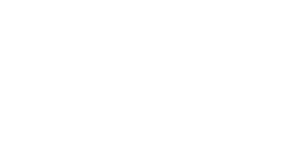

<IPython.core.display.Javascript object>


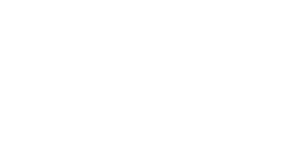

In [27]:
from skmultiflow.evaluation.evaluate_prequential import EvaluatePrequential
if __name__ == '__main__':
    #base_dir = 'log/synthetic/dangerous_driving/sudden_correlation_drift/'
    #base_dir = 'log/synthetic/dangerous_driving/gradual_correlation_drift/'
    #base_dir = 'log/synthetic/dangerous_driving/incremental_correlation_drift/'
    
    #base_dir = 'log/synthetic/sin_function/sudden_correlation_drift/'
    #base_dir = 'log/synthetic/sin_function/gradual_correlation_drift/'
    base_dir = 'log/synthetic/sin_function/incremental_correlation_drift/'
    
    # base_dir = 'log/real-world/poker_hand/'
    # base_dir = 'log/real-world/electricity/'
    # base_dir = 'log/real-world/airlines/'
    
    filename = 'stream_all.csv'
    
    model_names = ['NB','HT']
    
    #model_names = ['NB','HAT','ARF']

    detect_drift_method_name = 'CDDM'
        
    #detected_drift_points = np.array([500])
    #detected_drift_points = np.array([410])
    # detected_drift_points = np.array([560])
    
    #detected_drift_points = np.array([500])
    #detected_drift_points = np.array([410])
    detected_drift_points = np.array([230])
    
    # detected_drift_points = np.array([590.0,  890.0, 1270.0, 2010.0, 2550.0])
    # detected_drift_points = np.array([270.0, 1090.0, 1330.0, 1690.0, 2463.0])
    # detected_drift_points = np.array([1050.0,4350.0])
    predict_stream(base_dir, filename, model_names, fading_factors=np.array([0.99]))
    predict_stream_with_passive_adapt(base_dir,filename,model_names)
    predict_stream_with_active_adapt(base_dir, filename, model_names, detect_drift_method_name, detected_drift_points, retrain_num = 200, reset=False, fading_factors=np.array([0.99]))
    predict_stream_with_active_adapt(base_dir, filename, model_names, detect_drift_method_name, detected_drift_points, retrain_num = 200, reset=True, fading_factors=np.array([0.99]))
    predict_stream_with_sliding_window(base_dir,filename, model_names)

In [12]:
import matplotlib.pyplot as plt

def plot_accuracy_over_time(df, model_names, fading_factors, output_folder):
    for model_name in model_names:
        plt.figure()
        for fading_factor in fading_factors:
            col_name = f'mean_acc_{fading_factor}_fading_[{model_name}]'
            plt.plot(df['id'], df[col_name], label=f'Fading Factor = {fading_factor}')
        plt.xlabel('Sample number')
        plt.ylabel('Mean Accuracy')
        plt.title(f'Mean Accuracy over Time - {model_name}')
        plt.legend()
        plt.savefig(f'{output_folder}mean_accuracy_{model_name}.png')
        plt.close()

# 在函数的末尾添加以下代码
plot_accuracy_over_time(df, model_names, fading_factors, output_folder)

NameError: name 'df' is not defined

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def plot_correlation(base_dir, filename, drift_points, drift_type='sudden',sliding_window_size=50):
    df = pd.read_csv(f'{base_dir}{filename}',header=None)
    corr = np.array(df[0])
    time = np.array([i for i in range(sliding_window_size, sliding_window_size + corr.shape[0])])

    plt.plot(time,corr)
    plt.xlabel('Sample number')
    plt.ylabel('Correlation')
    
    if drift_type =='sudden':
        for drift_point in drift_points:
            plt.axvline(drift_point,color='red',linestyle='--')
    elif drift_type == 'gradual':
        drift_range = np.zeros(2)
        for index, drift_point in enumerate(drift_points):
            drift_range[index % 2] = drift_point
            if index % 2==1:
                plt.axvspan(drift_range[0],drift_range[1],color='tab:red',alpha=0.3)
    elif drift_type == 'incremental':
        drift_range = np.array([drift_points[0], sliding_window_size + corr.shape[0]])
        plt.axvspan(drift_range[0],drift_range[1],color='tab:red',alpha=0.3)
           
    middle_dir = base_dir.split('/',1)[-1]
    filename_without_abbr = filename.split('.')[0]
    plt.savefig(f'log/{middle_dir}{filename_without_abbr}.png',dpi=600)
    plt.show()
    plt.close()
    


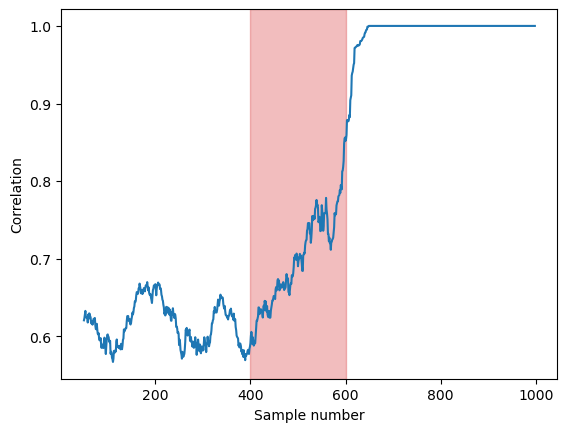

In [48]:
if __name__ == '__main__':
    
    #base_dir = 'log/synthetic/dangerous_driving/sudden_correlation_drift/'
    base_dir = 'log/synthetic/dangerous_driving/gradual_correlation_drift/'
    #base_dir = 'log/synthetic/dangerous_driving/incremental_correlation_drift/'
    #base_dir = 'log/synthetic/sin_function/sudden_correlation_drift/'
    #base_dir = 'log/synthetic/sin_function/gradual_correlation_drift/'
    #base_dir = 'log/synthetic/sin_function/incremental_correlation_drift/'
    
    filename = 'correlation2.csv'
    
    #drift_type = 'sudden'
    drift_type = 'gradual'
    #drift_type = 'incremental'
    
    #drift_points = np.array([500])
    drift_points = np.array([400,600])
    #drift_points = np.array([200])
    
    
    plot_correlation(base_dir,filename,drift_points,drift_type)

In [1]:
import os
import numpy as np
import pandas as pd
import matlab.engine
import logging
from pathlib import Path

from correlation import correlation_pairwise, correlation_mean
from skmultiflow.drift_detection import PageHinkley
def read_streams(base_dir,header):
    streams = list()
    stream_all = None
    
    base_dir_list = os.listdir(base_dir)
    for file in base_dir_list:
        file_abbr = file.split('.')[-1]
        file_dir = os.path.join(base_dir, file)
        if (file.startswith('stream')) and (file_abbr=='csv'):
            if header is None:
                df = pd.read_csv(file_dir, header=None)
            else:
                df = pd.read_csv(file_dir)
            if file.split('.')[0].endswith('all'):
                stream_all = np.array(df)
            else:
                streams.append(np.array(df))
            
    return streams, stream_all
corrs_window_size = 50

single_stream_drift_detection_methods = ['HCDT','HLFR']



In [46]:
import scipy.signal as signal
if __name__ == '__main__':
    #base_dir = 'log/synthetic/dangerous_driving/sudden_correlation_drift/'
    base_dir = 'log/synthetic/dangerous_driving/gradual_correlation_drift/'
    #base_dir = 'log/synthetic/dangerous_driving/incremental_correlation_drift/'
    #base_dir = 'log/synthetic/sin_function/sudden_correlation_drift/'
    #base_dir = 'log/synthetic/sin_function/gradual_correlation_drift/'
    #base_dir = 'log/synthetic/sin_function/incremental_correlation_drift/'
    
    drift_detection_method = 'CDDM'
    
    output_folder = f'{base_dir}detect_result/'
    path = Path(output_folder)    
    path.mkdir(parents=True, exist_ok=True)
    output_file = f'{output_folder}detect_stream_{drift_detection_method}.log'
    logging.basicConfig(level=logging.INFO, filename=output_file, format='%(message)s', filemode='w')
    
    streams, stream_all = read_streams(base_dir,header=np.array([]))  
    
    # calculate correlation
    corrs = correlation_mean(streams,correlation_type='pearson',window_size=corrs_window_size,save_file=True,output_dir=f'{base_dir}correlation3.csv')
    corrs = correlation_pairwise1(streams[1],streams[2],correlation_type='cross',window_size=corrs_window_size,save_file=True,output_dir=f'{base_dir}correlation2.csv')
    
    logging.debug(f'Correlation stream: {corrs}')

In [12]:
def correlation_pairwise_univariate1(stream_x1, stream_x2, window_size=50,correlation_type='cross',save_file=True,output_dir=''):
    corrs = np.array([])
    for i in range(window_size, stream_x1.shape[0]):
        stream_1_slot = stream_x1[i-window_size:i]
        stream_2_slot = stream_x2[i-window_size:i]
        if correlation_type == 'cross':
            corr = signal.correlate(stream_1_slot, stream_2_slot, mode='full')
            corr_lag_0 = corr[corr.shape[0]//2]
            normalization = np.sqrt((stream_1_slot ** 2).sum() * (stream_2_slot ** 2).sum())
            corr_normalized = corr_lag_0 / normalization
            corrs = np.append(corrs, corr_normalized)
        elif correlation_type == 'pearsonr':
            res = pearsonr(stream_1_slot,stream_2_slot)
            corrs = np.append(corrs,res.statistic)
        elif correlation_type == 'spearman':
            res = spearmanr(stream_1_slot,stream_2_slot)
            corrs = np.append(corrs,res.correlation)
        else:
            pass
    
    if save_file:
        np.savetxt(output_dir,corrs,delimiter=',')
    return corrs

In [38]:
def correlation_pairwise(stream_1,stream_2,correlation_type='cross',window_size=50,save_file=True,output_dir=''):
    stream_x1 = stream_1[:,:-1]
    stream_x2 = stream_2[:,:-1]
    if (stream_x1.ndim == 1) & (stream_x2.ndim==1):
        return correlation_pairwise_univariate(stream_x1,stream_x2,correlation_type,window_size,save_file,output_dir)
    if (stream_x1.ndim ==2) & (stream_x2.ndim==2):
        return correlation_pairwise_multivariate(stream_x1,stream_x2,correlation_type,window_size,save_file,output_dir)
    else:
        return None 

In [10]:
def correlation_pairwise_multivariate1(stream_x1, stream_x2, correlation_type='cross', window_size=50, save_file=True, output_dir=''):
    corrs = np.array([])
    for t in range(window_size, stream_x1.shape[0]):
        stream_1_slot = stream_x1[t-window_size:t, :]
        stream_2_slot = stream_x2[t-window_size:t, :]

        corrs_pairdim = np.array([])
        for i in range(stream_x1.shape[1]):
            for j in range(stream_x2.shape[1]):
                stream_1_slot_univariate = stream_1_slot[:, i]
                stream_2_slot_univariate = stream_2_slot[:, j]
                
                if correlation_type == 'cross':
                    corr = signal.correlate(stream_1_slot_univariate, stream_2_slot_univariate, mode='full')
                    corr_lag_0 = corr[corr.shape[0]//2]
                    normalization = np.sqrt((stream_1_slot_univariate**2).sum() * (stream_2_slot_univariate**2).sum())
                    corr_normalized = corr_lag_0 / normalization
                    corrs_pairdim = np.append(corrs_pairdim, corr_normalized)
                    
                elif correlation_type == 'pearson':
                    res = pearsonr(stream_1_slot_univariate, stream_2_slot_univariate)
                    corrs_pairdim = np.append(corrs_pairdim, res[0])  # 注意：pearsonr返回值是(statistic, p-value)格式，所以使用res[0]
                    
                elif correlation_type == 'spearman':
                    res = spearmanr(stream_1_slot_univariate, stream_2_slot_univariate)
                    corrs_pairdim = np.append(corrs_pairdim, res.correlation)

        corrs = np.append(corrs, np.mean(corrs_pairdim))

    if save_file:
        np.savetxt(output_dir, corrs, delimiter=',')
    return corrs

In [42]:
def correlation_pairwise_multivariate(stream_x1,stream_x2, correlation_type = 'cross', window_size=50,save_file=True,output_dir=''):
    corrs = np.array([])
    for t in range(window_size, stream_x1.shape[0]):
        stream_1_slot = stream_x1[t-window_size:t,:]
        stream_2_slot = stream_x2[t-window_size:t,:]
        
        corrs_pairdim = np.array([])
        for i in range(stream_x1.shape[1]):
            for j in range(stream_x2.shape[1]):
                stream_1_slot_univariate = stream_1_slot[:,i]
                stream_2_slot_univariate = stream_2_slot[:,j]
                if correlation_type == 'cross':
                    corr = signal.correlate(stream_1_slot_univariate, stream_2_slot_univariate, mode='full')
                    corr_lag_0 = corr[corr.shape[0]//2]/window_size
                    corrs_pairdim = np.append(corrs_pairdim,corr_lag_0)
                elif correlation_type == 'pearson':
                    res = pearsonr(stream_1_slot_univariate, stream_2_slot_univariate)
                    corrs_pairdim = np.append(corrs_pairdim, res.statistic)
                elif correlation_type == 'spearman':
                    res = spearmanr(stream_1_slot_univariate, stream_2_slot_univariate)
                    corrs_pairdim = np.append(corrs_pairdim, res.correlation)
        corrs = np.append(corrs,np.mean(corrs_pairdim))
        
    if save_file:
        np.savetxt(output_dir,corrs,delimiter=',')
    return corrs